<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge: 
#### Modeling Ames estate sale price based on different house features available.

 - [Problem Statement](#Problem-Statement)
 - [Background Information](#Background-Information)
 - [Methodology](#Methodology)
 - [Datasets](#Datasets)
 - [Data Import & Cleaning](#Data-Import-&-Cleaning)
 - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
 - [Modeling & Feature Engineering](#Modeling-&-Feature-Engineering)
 - [Significant Findings](#Significant-Findings)
 - [Conclusion](#Conclusion)
 - [Recommendations](#Recommendations)
 - [Citations and Sources](#Citations-and-Sources)

## Problem Statement

As data scientists engaged by Propnex, we are tasked to develop an accurate model to predict house sales in Ames, Lowas based on the given fixed house characteristics. We will approach this analysis by first modeling the sales prices of houses with default features from the dataset, and later performing features selection to optimize the model performance.


## Background

Many real estate organizations have traditionally relied on a mix of intuition and traditional, retrospective statistics to make pricing decisions ([*source1*](https://www.mckinsey.com/industries/real-estate/our-insights/getting-ahead-of-the-market-how-big-data-is-transforming-real-estate)). Today, a slew of new variables, such as proximity to points of interest and the existence of environmental pollution, allow for more vivid depictions of a location's future risks and benefits ([*source2*](https://www.redirectconsulting.com/blog/big-data-in-real-estate-3-important-non-traditional-data-sets-to-consider)).

The sweet spot between density and proximity to community amenities differs by American city and even neighborhood, hidden by an ever-increasing amount of data that is becoming increasingly difficult to manage. For instance, while the impact of the proximity of places of interest on property price is obvious, housing values are also influenced by the number, mix, and quality of community amenities that surround them ([*source1*](https://www.mckinsey.com/industries/real-estate/our-insights/getting-ahead-of-the-market-how-big-data-is-transforming-real-estate)).

These nonlinear interactions can be found in a variety of American cities. Thus, machine learning technique is one way to stitch together these data through sophisticated analytics, making it substantially easier to comprehend complex relationships.

A successful data-driven approach can yield powerful insights. In this analysis, we will attempt to develop an accurate and reliable machine-learning model to forecast the housing price in Ames, Lowas based on the given fixed house characteristics

## Methodology 

Following Blitzstein & Pfister’s workflow ([*source3*](https://github.com/cs109/2015/blob/master/Lectures/01-Introduction.pdf)), a 5 steps framework was implemented to conduct this analysis. These 5 steps are:

**Step 1: Ask an interesting question**
- Defining a clear and concise problem statement.

**Step 2: Get the data**
- Import and clean raw data to ensure that all datatypes were accurate and any other errors were fixed.
- Exploring best method to fill up null values, if applicable

**Step 3: Explore the data**
- Differentiate numerical and categorical features in the dataset
- For categorical features, analyze if they are nominal or ordinal features
- Transform ordinal features to numerical ranks
- Perform exploratory data analysis to determine any meaningful correlations
- Dealing with outliers
- Perform feature engineering

**Step 4: Model the data**
- Creating a base model with Linear Regression
- Perform feature selections/ feature engineering to optimize model performance
- Selecting the best Machine learning algorithm/model selection for submission
- Data Visualization
  - subplots
  - histograms
  - scatterplots
  - boxplots

**Step 5: Communicate and visualize the results**
- Present findings to a non-technical audience and provide recommendations

## Datasets

* [`train.csv`](./data/act_2017.csv): Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. This is the training dataset that includes the housing sale price.
* [`test.csv`](./data/act_2018.csv): Similar as above, but this is the testing dataset that excludes the housing sale price.

## Data Import & Cleaning

#### Importing Libraries

In [748]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [749]:
#set Id as index

X_train = pd.read_csv('../datasets/train.csv', na_filter = True)
X_train.set_index('Id', inplace=True)
X_test = pd.read_csv('../datasets/test.csv', na_filter = True)
X_test.set_index('Id', inplace=True)
y_train = X_train[['SalePrice']]

#### Basic Level of Check on Datasets

In [750]:
## dataframe shape for both training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(2051, 80)
(878, 79)
(2051, 1)


In [751]:
# Basic check on trianing dataset for null values, dtypes of all 79 features + 1 target variable
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [752]:
# Basic check on testing dataset for null values, dtypes of all 79 features
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              878 non-null    int64  
 1   MS SubClass      878 non-null    int64  
 2   MS Zoning        878 non-null    object 
 3   Lot Frontage     718 non-null    float64
 4   Lot Area         878 non-null    int64  
 5   Street           878 non-null    object 
 6   Alley            58 non-null     object 
 7   Lot Shape        878 non-null    object 
 8   Land Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot Config       878 non-null    object 
 11  Land Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition 1      878 non-null    object 
 14  Condition 2      878 non-null    object 
 15  Bldg Type        878 non-null    object 
 16  House Style      878 non-null    object 
 17  Overall Qual

In [753]:
# Basic check on trianing dataset for null values, dtypes of target variable
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  2051 non-null   int64
dtypes: int64(1)
memory usage: 32.0 KB


In [754]:
# Using describe() to locate any obvious errors with dataframes
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0
BsmtFin SF 1,2050.0,4.423005e+02,4.612041e+02,0.0,0.0,368.0,7.337500e+02,5644.0


In [755]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03
BsmtFin SF 1,878.0,4.413280e+02,4.384573e+02,0.0,0.000000e+00,373.0,7.347500e+02,2.288000e+03


#### Observations: A fair amount of null values are observed and some outliers are also seen in our dependent variable, with max at 600k while the interquartile range for 50% and 75% at 162.5k and 214k respectively.

#### Checking for duplicated rows in datasets

In [756]:
# no duplicated Id found in training dataset
X_train[X_train.index.duplicated()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [757]:
# no duplicated Id found in testing dataset
X_test[X_test.index.duplicated()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,


### <font color='Blue'> Function 1: Create a function to rank the percentage of null values among the 79 features for training and testing datasets, and return features with null values </font>

In [758]:
def rank_null_features(dataframe):
    dataframe_null = dataframe.isnull().sum().sort_values(ascending=False)
    dataframe_null = pd.DataFrame(dataframe_null, columns=['No of Missing Data'])
    return dataframe_null[dataframe_null['No of Missing Data']>0]

#### Training Dataset

In [759]:
rank_null_features(X_train)

,No of Missing Data
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651
Fireplace Qu,1000
Lot Frontage,330
Garage Finish,114
Garage Qual,114
Garage Yr Blt,114
Garage Cond,114


#### Testing Dataset

In [760]:
rank_null_features(X_test)

,No of Missing Data
Pool QC,874
Misc Feature,837
Alley,820
Fence,706
Fireplace Qu,422
Lot Frontage,160
Garage Yr Blt,45
Garage Finish,45
Garage Qual,45
Garage Cond,45


#### Observation: Looks like both training and testing datasets have consistent features that have NaN Data. Let's look at these following features from data documentation..

1) Pool QC (Ordinal): Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
2) Misc Feature (Nominal): Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
3) Alley (Nominal): Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
4) Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
5) FireplaceQu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
6) Lot Frontage (Continuous): Linear feet of street connected to property

#### Observation: But wait.. are they truly Nan values or "NA" values for categorical features? Since pandas read_csv() method interprets 'NA' as nan (not a number) instead of a valid string. Let do a read_csv() again, registering only blanks as Nan values

In [761]:
X_train_1 = pd.read_csv('../datasets/train.csv', keep_default_na=False,na_values='')
X_train_1.set_index('Id', inplace=True)
X_test_1 = pd.read_csv('../datasets/test.csv', keep_default_na=False, na_values='')
X_test_1.set_index('Id', inplace=True)

#### Parsing the dataframes to Function 1 to check for NaN values now

In [762]:
rank_null_features(X_train_1)

,No of Missing Data
Lot Frontage,330
Garage Yr Blt,114
Mas Vnr Area,22
Mas Vnr Type,22
Bsmt Exposure,4
BsmtFin Type 2,2
Bsmt Full Bath,2
Bsmt Half Bath,2
Garage Cond,1
Bsmt Cond,1


In [763]:
rank_null_features(X_test_1)

,No of Missing Data
Lot Frontage,160
Garage Yr Blt,45
Garage Finish,1
Mas Vnr Area,1
Mas Vnr Type,1
Electrical,1


#### Differentiating NaN values with NA values in all categorical features

In [764]:
#checking for blank values in all catergorical features in train data
obj_cols =  set(X_train_1.select_dtypes([object]).columns)
X_train_1[list(obj_cols)].isnull().sum()

House Style        0
Foundation         0
Kitchen Qual       0
Condition 2        0
Bldg Type          0
Functional         0
Lot Shape          0
Exter Qual         0
Electrical         0
Sale Type          0
Bsmt Exposure      4
Exter Cond         0
Exterior 2nd       0
Alley              0
Fence              0
Garage Qual        1
Utilities          0
Neighborhood       0
BsmtFin Type 1     1
Central Air        0
Garage Finish      1
Land Slope         0
MS Zoning          0
Pool QC            0
Street             0
Heating            0
Roof Style         0
Paved Drive        0
Condition 1        0
Bsmt Qual          1
Garage Cond        1
Lot Config         0
Exterior 1st       0
Heating QC         0
Fireplace Qu       0
Garage Type        0
Mas Vnr Type      22
Misc Feature       0
Land Contour       0
Bsmt Cond          1
Roof Matl          0
BsmtFin Type 2     2
dtype: int64

In [765]:
#checking for blank values in all catergorical features in test data
obj_cols =  set(X_test_1.select_dtypes([object]).columns)
X_test_1[list(obj_cols)].isnull().sum()

House Style       0
Foundation        0
Kitchen Qual      0
Condition 2       0
Bldg Type         0
Functional        0
Lot Shape         0
Exter Qual        0
Electrical        1
Sale Type         0
Bsmt Exposure     0
Exter Cond        0
Exterior 2nd      0
Alley             0
Fence             0
Garage Qual       0
Utilities         0
Neighborhood      0
BsmtFin Type 1    0
Central Air       0
Garage Finish     1
Land Slope        0
MS Zoning         0
Pool QC           0
Street            0
Heating           0
Roof Style        0
Paved Drive       0
Condition 1       0
Bsmt Qual         0
Garage Cond       0
Lot Config        0
Exterior 1st      0
Heating QC        0
Fireplace Qu      0
Garage Type       0
Mas Vnr Type      1
Misc Feature      0
Land Contour      0
Bsmt Cond         0
Roof Matl         0
BsmtFin Type 2    0
dtype: int64

#### Observation: The NA values reflected in the categorical features mostly represent the lack of house feature rather than a null/blank value. Therefore, it is also important to differentiate between NaN (Blank) vs NA data for categorical features.

### <font color='blue'> Function 2: Create a function to quantify 'NaNs' (blank) data in all categorical features for both training and testing datasets, and return unique item names in the feature

In [766]:
# Check which categorical columns are missing values and what are the unique items for each object column

def check_categorical_cols(df):
    check_cols = df.select_dtypes([object]).columns
    for col in check_cols:
        n_nan = df[col].isnull().sum()
        n_unique = df[col].unique()
        n_nunique = df[col].nunique()
        if n_nan > 0:
            print(f"{col} has {n_nan} NaNs, this represents {round(n_nan/len(df)*100,2)}% of the data")
            print(f"{n_nunique} unique items in the column with the following names: {n_unique}\n")
    return

In [767]:
check_categorical_cols(X_train_1)

Mas Vnr Type has 22 NaNs, this represents 1.07% of the data
4 unique items in the column with the following names: ['BrkFace' 'None' nan 'Stone' 'BrkCmn']

Bsmt Qual has 1 NaNs, this represents 0.05% of the data
6 unique items in the column with the following names: ['TA' 'Gd' 'Fa' 'NA' 'Ex' nan 'Po']

Bsmt Cond has 1 NaNs, this represents 0.05% of the data
6 unique items in the column with the following names: ['TA' 'Gd' 'NA' 'Fa' 'Po' 'Ex' nan]

Bsmt Exposure has 4 NaNs, this represents 0.2% of the data
5 unique items in the column with the following names: ['No' 'Gd' 'Av' 'NA' 'Mn' nan]

BsmtFin Type 1 has 1 NaNs, this represents 0.05% of the data
7 unique items in the column with the following names: ['GLQ' 'Unf' 'ALQ' 'Rec' 'NA' 'BLQ' 'LwQ' nan]

BsmtFin Type 2 has 2 NaNs, this represents 0.1% of the data
7 unique items in the column with the following names: ['Unf' 'Rec' 'NA' 'BLQ' 'GLQ' 'LwQ' 'ALQ' nan]

Garage Finish has 1 NaNs, this represents 0.05% of the data
4 unique items 

In [768]:
check_categorical_cols(X_test_1)

Mas Vnr Type has 1 NaNs, this represents 0.11% of the data
5 unique items in the column with the following names: ['None' 'BrkFace' 'Stone' 'BrkCmn' 'CBlock' nan]

Electrical has 1 NaNs, this represents 0.11% of the data
4 unique items in the column with the following names: ['FuseP' 'SBrkr' 'FuseA' 'FuseF' nan]

Garage Finish has 1 NaNs, this represents 0.11% of the data
4 unique items in the column with the following names: ['Unf' 'Fin' 'RFn' 'NA' nan]



#### Observation: Cross-checking with data documentation, and as seen in earlier steps, all NA values are actually representing the lack of a certain feature in the house rather than a missing data. There are not many blank values (mostly <~1%) and for this analysis, we will be assuming NaN values represent the lack of feature. Replaced NaN values as either ‘None’ or ‘NA’ dependent on the categorical feature unique choices.

### <font color='blue'> Function 3: Create a function to fill up 'NaNs' (blank) data with 'None' or 'NA' in categorical features for both training and testing datasets (<~1%)

In [769]:
# Check values of categries and fill the NaNs with an appropriate str to represent the lack of feature

def clean_categorical_col(df):
    ls = ['NA','None']
    check_cols = df.select_dtypes([object]).columns
    for col in check_cols:
        for unique in list(df[col].unique()):
            if unique in ls:
                df[col] = df[col].fillna(unique)
    return

In [770]:
clean_categorical_col(X_train_1)

In [771]:
clean_categorical_col(X_test_1)

#### Parsing it back to Function 2 to check for any more NaN values in categorical features

In [772]:
check_categorical_cols(X_train_1)

In [773]:
check_categorical_cols(X_test_1)

Electrical has 1 NaNs, this represents 0.11% of the data
4 unique items in the column with the following names: ['FuseP' 'SBrkr' 'FuseA' 'FuseF' nan]



#### Observation: After cleaning up most of the categorical features, 1 more categorical feature (Electrical) have 1 blank value. We further examine the correlation it has with the dependent variable (SalePrice) in the training dataset via boxplot.

Electrical (Ordinal): Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

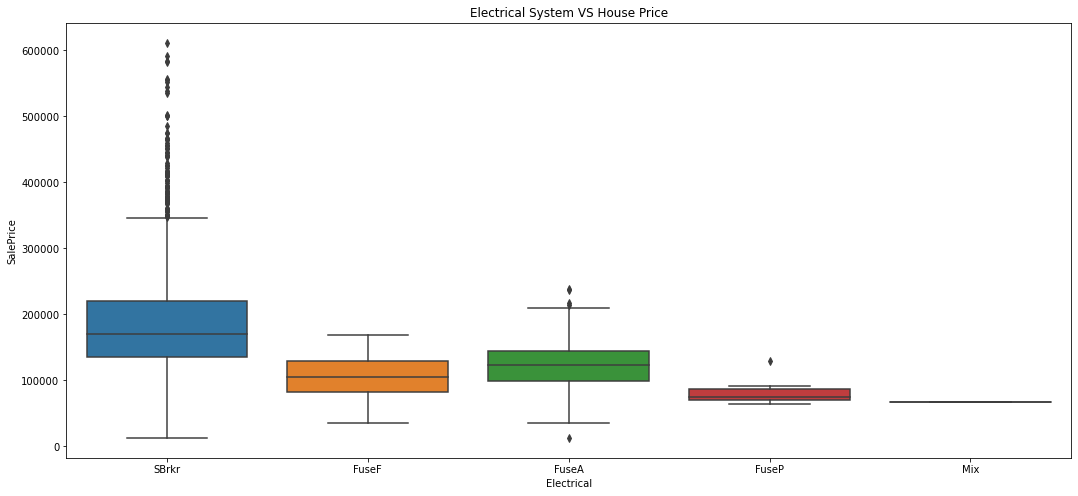

In [774]:
plt.figure(figsize = (18,8))
sns.boxplot(x='Electrical', y="SalePrice", data=X_train_1).set_title("Electrical System VS House Price");

In [775]:
X_train_1['Electrical'].value_counts(normalize=True)

SBrkr    0.910775
FuseA    0.068259
FuseF    0.017065
FuseP    0.003413
Mix      0.000488
Name: Electrical, dtype: float64

#### Observation: From the boxplot, looks like electrical does not have that much impact on the sale price unless the electrical system is SBrkr type. For this analysis, we will fill in the nan value of the test data with mode() method based on the training dataset.

In [776]:
mode_electrical = statistics.mode(X_train_1['Electrical'])

X_test_1['Electrical'] = X_test_1['Electrical'].fillna(mode_electrical)

In [777]:
check_categorical_cols(X_test_1)

In [778]:
print(f"Shape of training dataset: {X_train_1.shape}")
print(f"Shape of testing dataset: {X_test_1.shape}")

Shape of training dataset: (2051, 80)
Shape of testing dataset: (878, 79)


#### Observation: Great! We have cleaned up the missing data in categorical features for both train and test datasets, time to create a function to put in place a ranking system for ordinal features. According to data documentation, we have 23 ordinal variables in the dataset that needs to be ranked (Including ordinal features: Overall Qual and Overall Cond which are already ranked in the dataset). The ranking of the feature will be decided according to the order of the source, with the worst rating always starting from 0 ([*source4*](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))

In [779]:
# ordinal_ls exlude overall qual and overall cond
ordinal_ls = ['Lot Shape','Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

### <font color='blue'> Function 4: Create a function to put a ranking system in place for all 23 ordinal features in both training and testing datasets

In [780]:
# To rank ordinal features by order of the source 

def rank_ordinal_col(df, col, dict_ordinal):
    df[col + " Rank"] = df[col].map(dict_ordinal)
    df[col + " Rank"] = df[col + " Rank"].astype(int)
    return 

#### To rank ordinal features (10 nos) with following ratings:
       Rating   Rank
       Ex       5
       Gd       4
       TA       3
       Fa       2
       Po       1
       NA       0

In [781]:
dict_values = {'Ex': 5,
               'Gd' : 4,
               'TA' : 3,
               'Fa' : 2,
               'Po' : 1,
               'NA' : 0}
ordinal_quality_ls = ['Exter Qual', 
                      'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 
                      'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 
                      'Garage Qual', 'Garage Cond', 'Pool QC']

In [782]:
for col in ordinal_quality_ls:
    rank_ordinal_col(X_train_1,col,dict_values)

In [783]:
for col in ordinal_quality_ls:
    rank_ordinal_col(X_test_1,col,dict_values)

#### To rank ordinal features (2 nos) with following ratings:
       Rating   Rank
       GLQ      6
       ALQ      5
       BLQ      4   
       Rec      3
       LwQ      2
       Unf      1
       NA       0

In [784]:
dict1_values = {'GLQ':  6,
                'ALQ' : 5,
                'BLQ' : 4,
                'Rec' : 3,
                'LwQ' : 2,
                'Unf' : 1,
                'NA'  : 0}
ordinal_basement_ls = ['BsmtFin Type 1','BsmtFin Type 2']

In [785]:
for col in ordinal_basement_ls:
    rank_ordinal_col(X_train_1,col,dict1_values)

In [786]:
for col in ordinal_basement_ls:
    rank_ordinal_col(X_test_1,col,dict1_values)

#### Now for the rest of the ordinal features...

In [787]:
dict2_values = {'Reg' : 3,
                'IR1' : 2,
                'IR2' : 1,
                'IR3' : 0
               }

dict3_values = {'AllPub' : 3,
                'NoSewr' : 2,
                'NoSeWa' : 1,
                'ELO'    : 0
               }

dict4_values = {'Gtl':  2,
                'Mod' : 1,
                'Sev' : 0
               }

dict5_values = {'Gd':  4,
                'Av' : 3,
                'Mn' : 2,
                'No' : 1,
                'NA' : 0
               }

dict6_values = {'SBrkr' : 4,
                'FuseA' : 3,
                'FuseF' : 2,
                'FuseP' : 1,
                'Mix'   : 0
               }

dict7_values = {'Typ':  7,
                'Min1': 6,
                'Min2': 5,
                'Mod' : 4,
                'Maj1': 3,
                'Maj2': 2,
                'Sev' : 1,
                'Sal' : 0            
               }

dict8_values = {'Fin' : 3,
                'RFn' : 2,
                'Unf' : 1,
                'NA'  : 0
               }

dict9_values = {'Y' : 2,
                'P' : 1,
                'N' : 0
               }

dict10_values = {'GdPrv': 4,
                 'MnPrv': 3,
                 'GdWo' : 2,
                 'MnWw' : 1,
                 'NA'   : 0
                }

In [788]:
#Training Dataset

rank_ordinal_col(X_train_1,'Lot Shape',dict2_values)
rank_ordinal_col(X_train_1,'Utilities',dict3_values)
rank_ordinal_col(X_train_1,'Land Slope',dict4_values)
rank_ordinal_col(X_train_1,'Bsmt Exposure',dict5_values)
rank_ordinal_col(X_train_1,'Electrical',dict6_values)
rank_ordinal_col(X_train_1,'Functional',dict7_values)
rank_ordinal_col(X_train_1,'Garage Finish',dict8_values)
rank_ordinal_col(X_train_1,'Paved Drive',dict9_values)
rank_ordinal_col(X_train_1,'Fence',dict10_values)

#Testing Dataset

rank_ordinal_col(X_test_1,'Lot Shape',dict2_values)
rank_ordinal_col(X_test_1,'Utilities',dict3_values)
rank_ordinal_col(X_test_1,'Land Slope',dict4_values)
rank_ordinal_col(X_test_1,'Bsmt Exposure',dict5_values)
rank_ordinal_col(X_test_1,'Electrical',dict6_values)
rank_ordinal_col(X_test_1,'Functional',dict7_values)
rank_ordinal_col(X_test_1,'Garage Finish',dict8_values)
rank_ordinal_col(X_test_1,'Paved Drive',dict9_values)
rank_ordinal_col(X_test_1,'Fence',dict10_values)

In [789]:
print(f"Shape of training dataset: {X_train_1.shape}")
print(f"Shape of testing dataset: {X_test_1.shape}")

Shape of training dataset: (2051, 101)
Shape of testing dataset: (878, 100)


In [790]:
#Dropping oringal ordinal feature columns
X_train_1.drop(ordinal_ls,axis=1, inplace=True)
X_test_1.drop(ordinal_ls,axis=1, inplace=True)

In [791]:
#training dataset still contains target variable hence, +1 from testdata set
print(f"Shape of training dataset: {X_train_1.shape}")
print(f"Shape of testing dataset: {X_test_1.shape}")

Shape of training dataset: (2051, 80)
Shape of testing dataset: (878, 79)


#### Let's use get_dummies for the categorical features in both of our training and testing datasets

#### Before performing get dummies, we noticed 2 nominal features (‘Neighbourhood’ and ‘MS Subclass’) that have many dummies columns which may contribute to the overfit during modeling. We further examine the correlation it has with the dependent variable (SalePrice) in the training dataset via boxplot.:

Neighborhood (Nominal): Physical locations within Ames city limits (map available)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	Greens
       GrnHill	Green Hills
       IDOTRR	Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
       

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       

#### Neighborhood

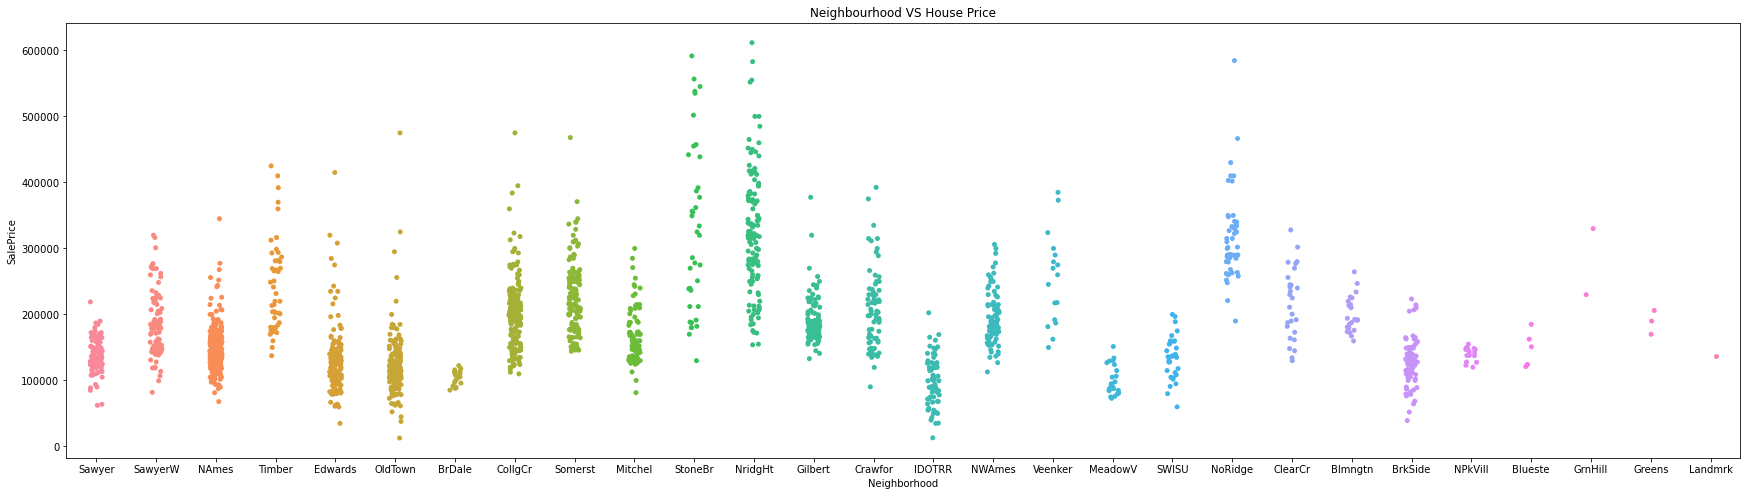

In [792]:
plt.figure(figsize = (30,8))
sns.stripplot(x='Neighborhood', y="SalePrice", data=X_train_1).set_title("Neighbourhood VS House Price");

In [793]:
X_train_1['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [794]:
X_train_1.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False)

Neighborhood
StoneBr    322450
NridgHt    317500
NoRidge    300750
GrnHill    280000
Veenker    260000
ClearCr    225000
Somerst    224000
Timber     220000
CollgCr    200000
Crawfor    199500
Blmngtn    192250
Greens     190000
NWAmes     185000
SawyerW    181000
Gilbert    180750
Mitchel    160000
NPkVill    143000
NAmes      141000
Blueste    137500
Landmrk    137000
SWISU      136200
Sawyer     135000
BrkSide    128000
Edwards    125000
OldTown    120000
BrDale     105500
IDOTRR     102000
MeadowV     92450
Name: SalePrice, dtype: int64

#### Let's convert this to an ordinal feature to reduce the chance of overfitting, we will rank the feature according to the feature median price, 3 being Excellent (>75% of the sale price), 2 being Good (50% to 75% of the sale price), 1 being Fair (25% to 50% of the sale price), 0 being Cheap (<25% of the sale price).

In [795]:
def map_neighbourhood(df,col):
    
    for i in range(0,len(df)):
        
        val = df[col].values[i]
        
        if val in ['StoneBr','NridgHt','NoRidge','GrnHill','Veenker','ClearCr','Somerst','Timber']:
            df[col].values[i] = 3
            
        elif val in ['CollgCr','Crawfor','Blmngtn','Greens','NWAmes','SawyerW','Gilbert']:
            df[col].values[i] = 2
            
        elif val in ['Mitchel','NPkVill','NAmes','Blueste','Landmrk','SWISU','Sawyer']:
            df[col].values[i] = 1
            
        else:
            df[col].values[i] = 0  

In [796]:
map_neighbourhood(X_train_1,'Neighborhood')
X_train_1['Neighborhood'] = X_train_1['Neighborhood'].astype(int)

map_neighbourhood(X_test_1,'Neighborhood')
X_test_1['Neighborhood'] = X_test_1['Neighborhood'].astype(int)

#### MS SubClass

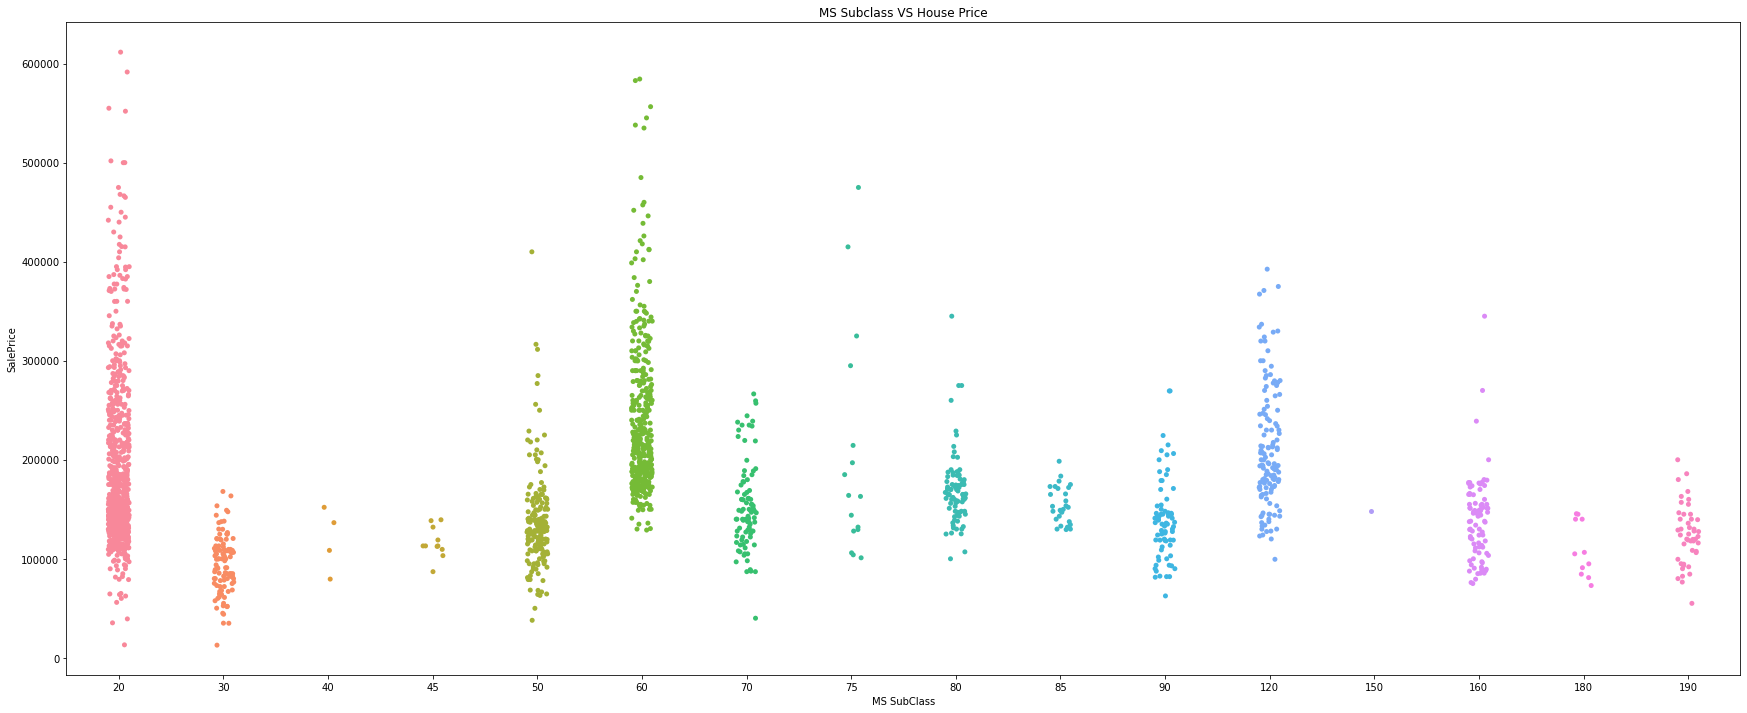

In [797]:
plt.figure(figsize = (30,12))
sns.stripplot(x='MS SubClass', y="SalePrice", data=X_train_1).set_title("MS Subclass VS House Price");

In [798]:
X_train_1.groupby(['MS SubClass'])['SalePrice'].median().sort_values(ascending=False)

MS SubClass
60     215100
120    196000
80     165000
75     163500
20     160000
85     150950
150    148400
70     147500
160    140500
90     136000
50     129675
190    123250
40     122500
45     113000
180    105000
30      99500
Name: SalePrice, dtype: int64

#### Same as above, let's convert this to an ordinal feature to reduce the chance of overfitting, we will rank the feature according to the median price of the feature, 3 being Excellent (>75% of the sale price), 2 being Good (50% to 75% of the sale price), 1 being Fair (25% to 50% of the sale price), 0 being Cheap (<25% of the sale price).

In [799]:
def map_ms_subclass(df,col):
    
    for i in range(0,len(df)):
        
        val = df[col].values[i]
        
        if val in [60]:
            df[col].values[i] = 3
            
        elif val in [75,80,120]:
            df[col].values[i] = 2
            
        elif val in [20,85,150,70,160,90,50]:
            df[col].values[i] = 1
            
        else:
            df[col].values[i] = 0 

In [800]:
map_ms_subclass(X_train_1,'MS SubClass')
map_ms_subclass(X_test_1,'MS SubClass')

In [801]:
#list of nominal features
obj_cols = set(X_train_1.select_dtypes([object]).columns)
obj_cols = list(obj_cols)

In [802]:
ordinal_ls = ['Heating QC Rank', 'Exter Qual Rank', 'Land Slope Rank', 'Electrical Rank', 'Kitchen Qual Rank', 'Bsmt Qual Rank', 'Paved Drive Rank', 'BsmtFin Type 2 Rank', 'Garage Qual Rank', 'Lot Shape Rank', 'Fireplace Qu Rank', 'Pool QC Rank', 'Garage Cond Rank', 'Fence Rank', 'Exter Cond Rank', 'Utilities Rank', 'Bsmt Cond Rank', 'BsmtFin Type 1 Rank', 'Garage Finish Rank', 'Functional Rank', 'Bsmt Exposure Rank', 'Neighborhood', 'MS SubClass', 'Overall Qual', 'Overall Cond'] 

#### To analyse the boxplots of all ordinal features with respect to sale price

In [803]:
def create_boxplot(df,ls):
    for col in ls:
        plt.figure(figsize = (8,8))
        x = df[[col,'SalePrice']]
        sns.boxplot(x=col,y='SalePrice',data=x)
        plt.title(col+' vs Sale Price')
       

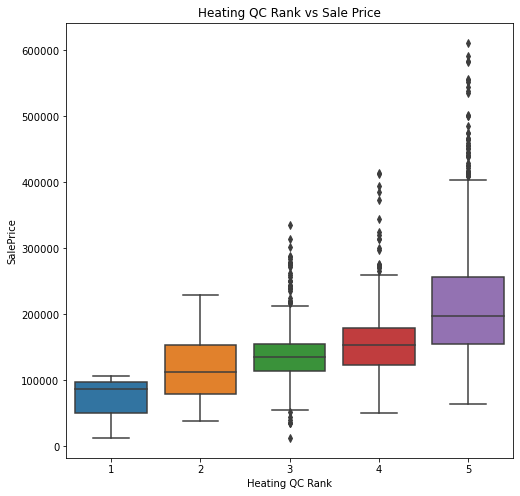

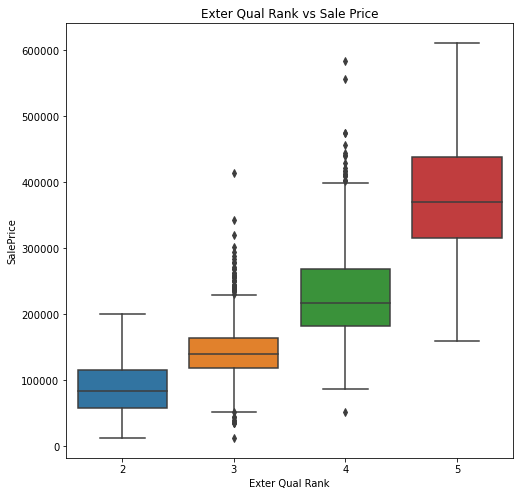

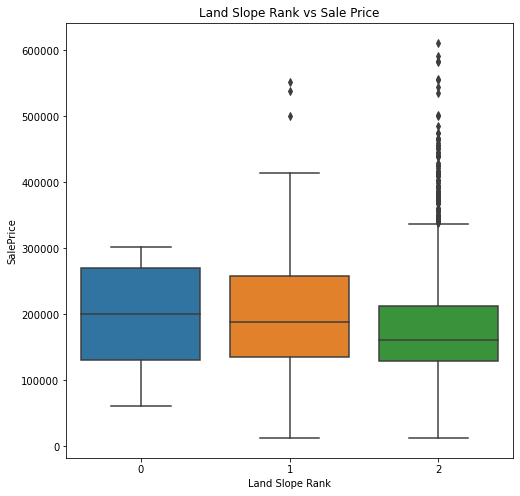

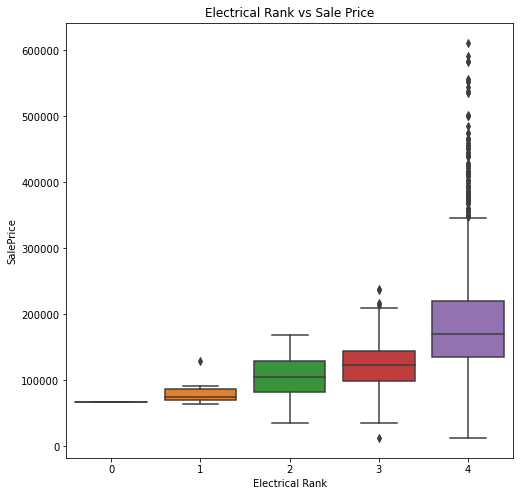

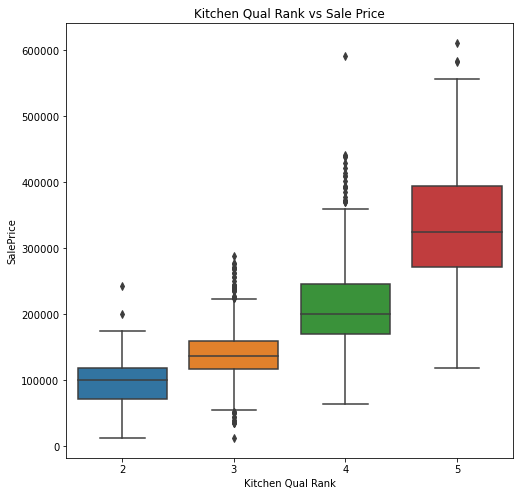

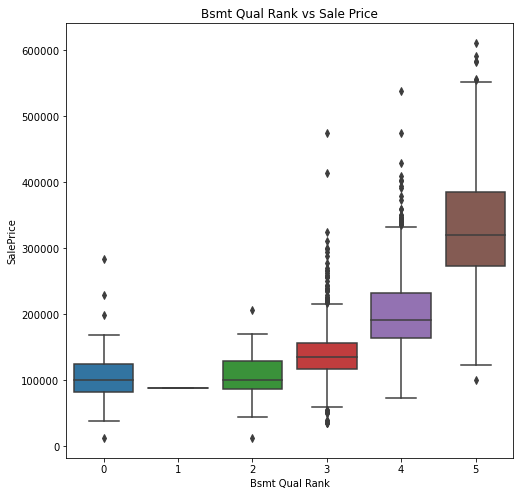

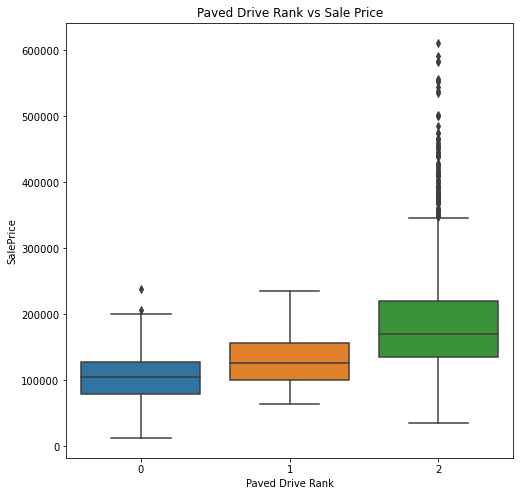

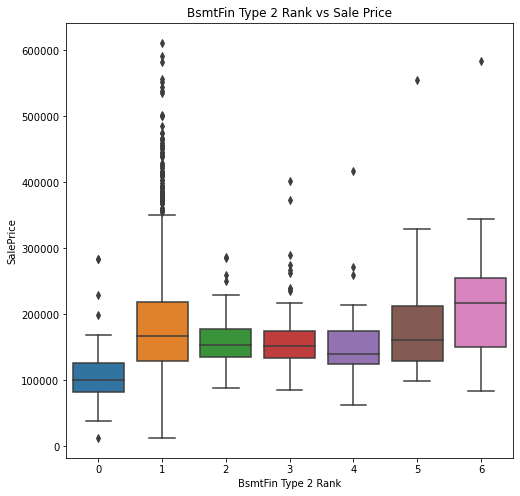

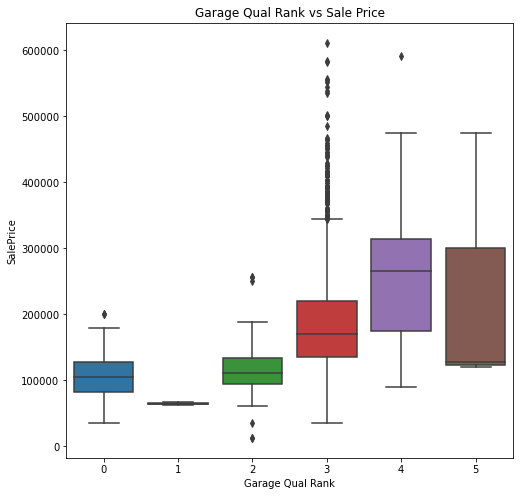

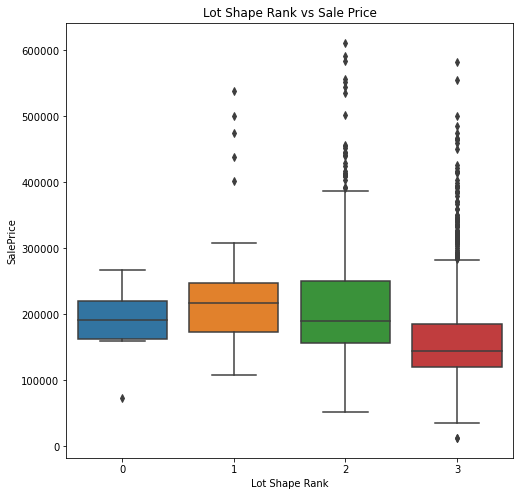

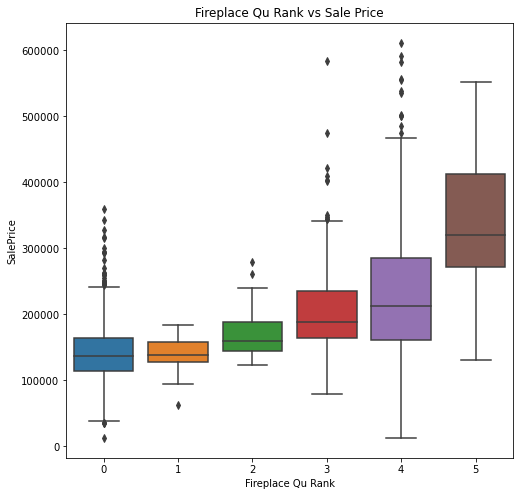

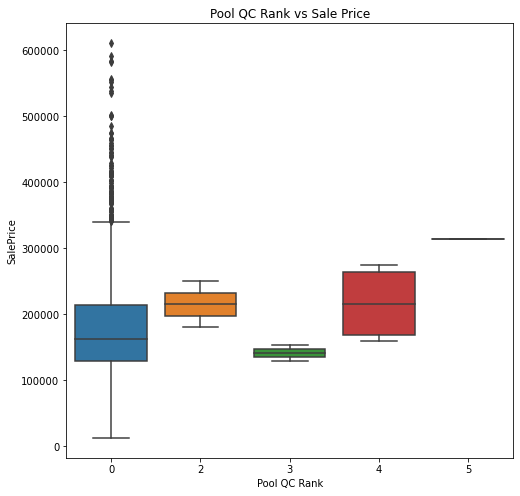

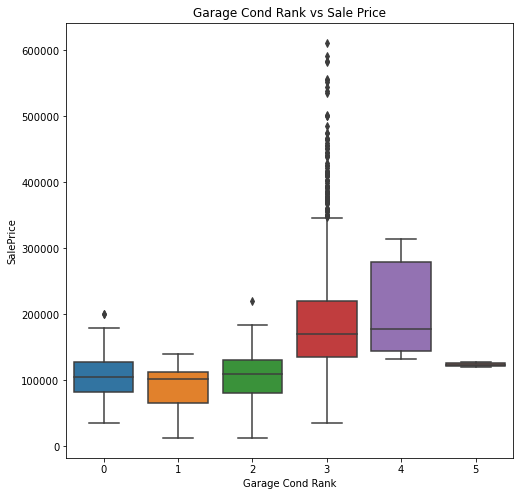

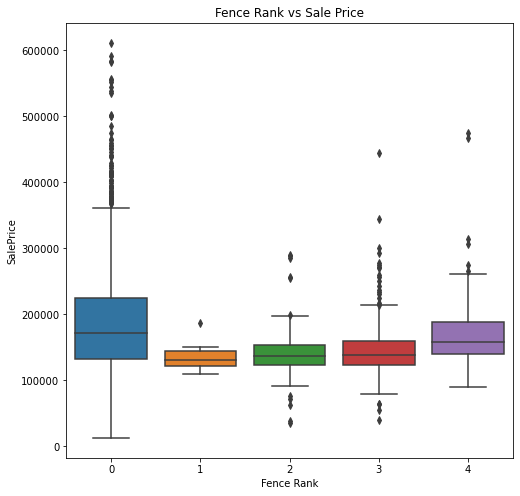

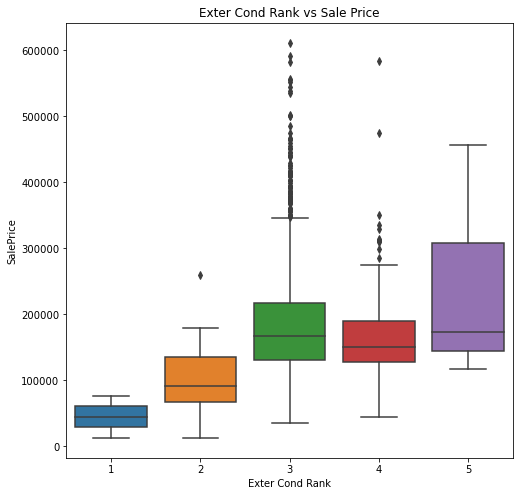

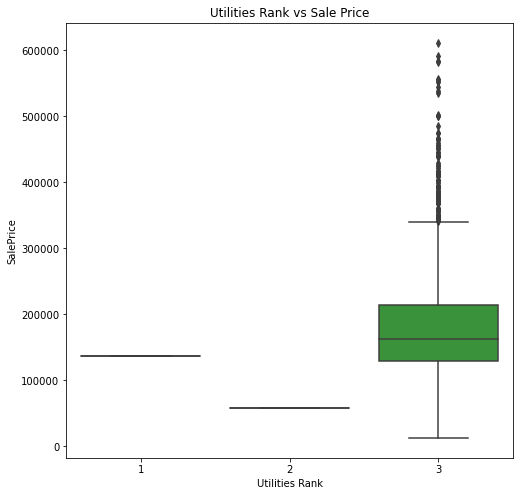

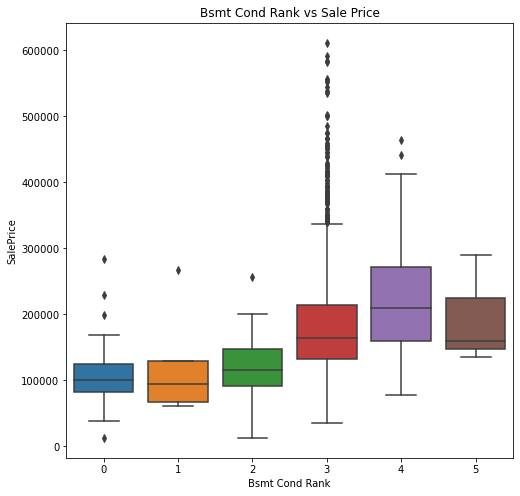

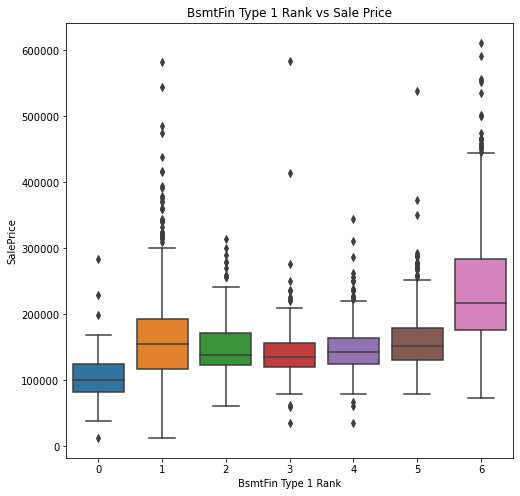

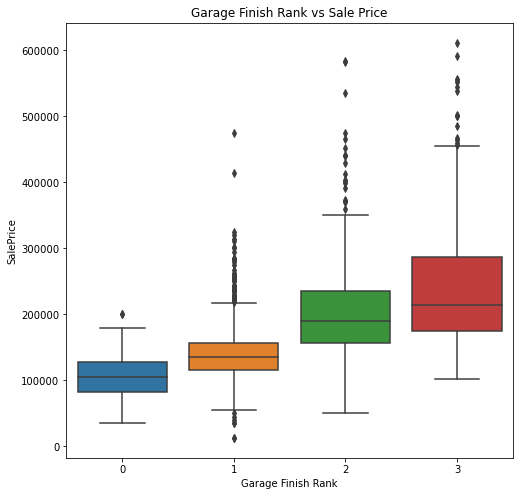

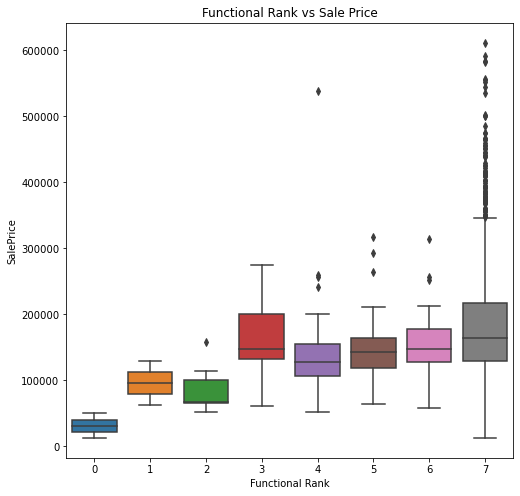

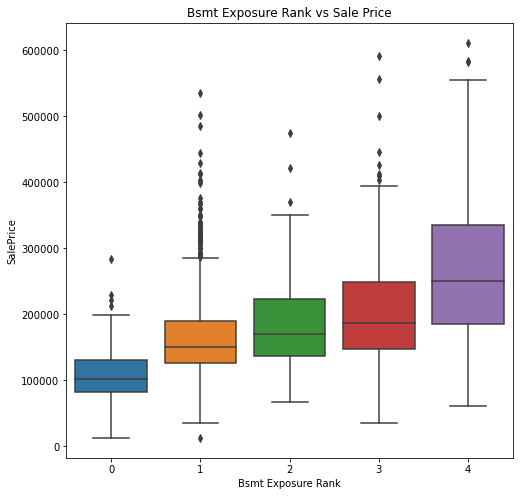

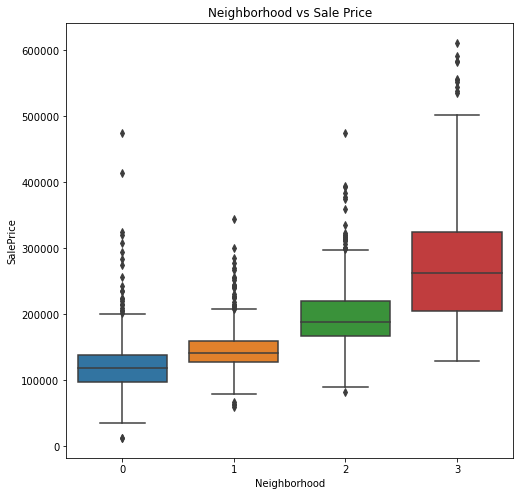

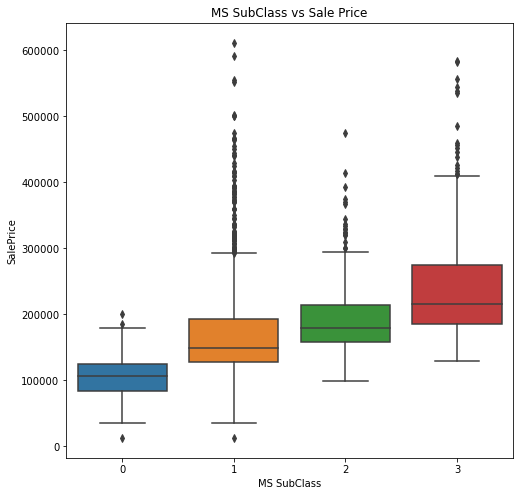

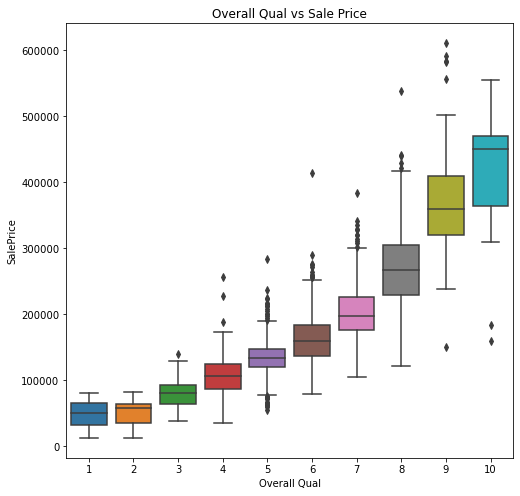

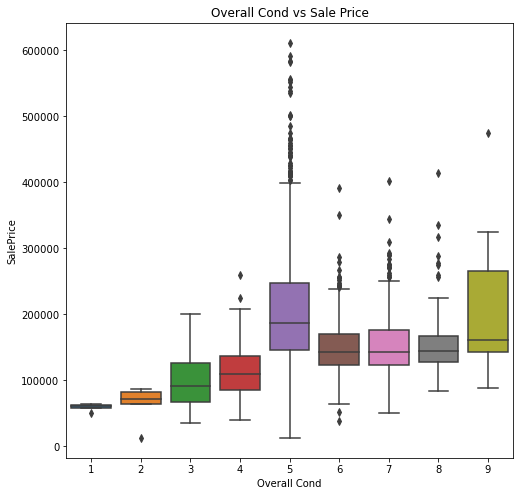

In [804]:
create_boxplot(X_train_1,ordinal_ls)

#### Making an assumption that the rest of the ordinal categoricals are equally space, we have narrow down the ordinal list to the following for get_dummies operation:

In [805]:
filtered_ordinal_ls = ['Bsmt Qual Rank','BsmtFin Type 1 Rank','BsmtFin Type 2 Rank','Garage Qual Rank','Lot Shape Rank','Pool QC Rank','Garage Cond Rank','Fence Rank','Exter Qual Rank','Utilities Rank','Bsmt Qual Rank','Functional Rank','Overall Cond']

In [806]:
#Combine norminal and filtered ordinal features
obj_cols = set(filtered_ordinal_ls + obj_cols)

In [807]:
X_train_1 = pd.get_dummies(data=X_train_1, columns=obj_cols,drop_first=True)
X_test_1 = pd.get_dummies(data=X_test_1, columns=obj_cols,drop_first=True)

In [808]:
print(f"Shape of training dataset: {X_train_1.shape}")
print(f"Shape of testing dataset: {X_test_1.shape}")

Shape of training dataset: (2051, 218)
Shape of testing dataset: (878, 203)


In [809]:
# Get dummies could leave us with mismatched columns between training and testing datasets
# Make sure we have mathcing columns in the train and test DataFrames

cols_train = X_train_1.columns
cols_test = X_test_1.columns
list(cols_train)
list(cols_test)

for col in cols_train:
    if col not in cols_test:
        X_test_1[col] = 0
X_test_1.drop('SalePrice',axis=1,inplace=True)

for col in cols_test:
    if col not in cols_train:
        X_train_1[col] = 0

print(f"Shape of training dataset: {X_train_1.shape}")
print(f"Shape of testing dataset: {X_test_1.shape}")

Shape of training dataset: (2051, 226)
Shape of testing dataset: (878, 225)


#### Final Check if training and testing datasets still contain any categorical features

In [810]:
#no categorical features left for training dataset
set(X_train_1.select_dtypes([object]).columns)

set()

In [811]:
#no categorical features left for testing dataset
set(X_test_1.select_dtypes([object]).columns)

set()

#### Excellent! Now we have cleaned up all categorical features for both datasets, let's shift our focus to cleaning up the numerical data

### <font color='blue'> Function 5: Create a function to identify numiercal features for both training and testing datasets

In [812]:
def check_numeric_cols(df):
    numeric_cols = df.select_dtypes([np.int64,np.float64,np.uint64]).columns
    return numeric_cols

In [813]:
check_numeric_cols(X_train)

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [814]:
check_numeric_cols(X_test)

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

#### Observation: Features 'MS SubClass' (nominal), 'Overall Qual' and 'Overall Cond' (ordinal) have been dealt with previously, 'PID' is the unique identification number (nominal). To remove these 4 categorical features from the numeric list.

In [815]:
numeric_ls = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 
              'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
              'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
              'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 
              'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 
              'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 
              'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
              'Screen Porch','Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']

### <font color='blue'> Function 6: Create a function to quantify NaNs data in all numeric features for both training and testing datasets

In [816]:
# Check which numeric columns are missing values 

def check_numeric_cols(df):
    for col in numeric_ls:
        n_nan = df[col].isnull().sum()
        if n_nan > 0:
            print(f"{col} has {n_nan} NaNs, this represents {round(n_nan/len(df)*100,2)}% of the data")
    return

In [817]:
check_numeric_cols(X_train)

Lot Frontage has 330 NaNs, this represents 16.09% of the data
Mas Vnr Area has 22 NaNs, this represents 1.07% of the data
BsmtFin SF 1 has 1 NaNs, this represents 0.05% of the data
BsmtFin SF 2 has 1 NaNs, this represents 0.05% of the data
Bsmt Unf SF has 1 NaNs, this represents 0.05% of the data
Total Bsmt SF has 1 NaNs, this represents 0.05% of the data
Bsmt Full Bath has 2 NaNs, this represents 0.1% of the data
Bsmt Half Bath has 2 NaNs, this represents 0.1% of the data
Garage Yr Blt has 114 NaNs, this represents 5.56% of the data
Garage Cars has 1 NaNs, this represents 0.05% of the data
Garage Area has 1 NaNs, this represents 0.05% of the data


In [818]:
check_numeric_cols(X_test)

Lot Frontage has 160 NaNs, this represents 18.22% of the data
Mas Vnr Area has 1 NaNs, this represents 0.11% of the data
Garage Yr Blt has 45 NaNs, this represents 5.13% of the data


#### For this analysis, we will fill in the numeric features with less than 1.5% of missing data with mean value

### <font color='blue'> Function 7: Create a function to fill in NaNs data (<~1.5%) in all numeric features with the feature's mean value

In [819]:
# fill the NaNs with mean values

def clean_numeric_col(df):
    for col in numeric_ls:
        n_nan = df[col].isnull().sum()
        if n_nan/len(df)*100 < 1.5:
            mean_col = np.mean(df[col])
            df[col] = df[col].fillna(mean_col)
    return

In [820]:
clean_numeric_col(X_train)

In [821]:
check_numeric_cols(X_train)

Lot Frontage has 330 NaNs, this represents 16.09% of the data
Garage Yr Blt has 114 NaNs, this represents 5.56% of the data


#### Fill up numeric feature NaNs data (<~1%) in test dataset  with mean value from training dataset

In [822]:
mean_col = np.mean(X_train['Mas Vnr Area'])
X_test['Mas Vnr Area'] = X_test['Mas Vnr Area'].fillna(mean_col)

In [823]:
check_numeric_cols(X_test)

Lot Frontage has 160 NaNs, this represents 18.22% of the data
Garage Yr Blt has 45 NaNs, this represents 5.13% of the data


#### Observation: Only 2 numeric features remain: 'Lot Frontage' and 'Garage Yr Blt'. Let's examine the relationship they have with the 'SalePrice'

<Figure size 1296x432 with 0 Axes>

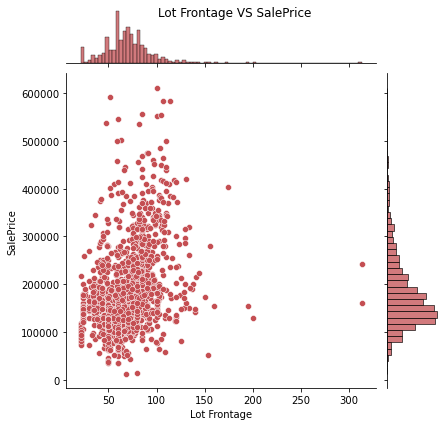

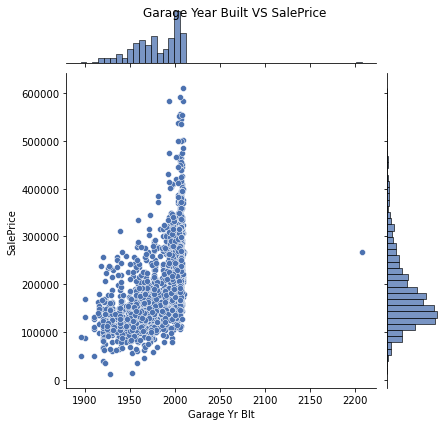

In [824]:
sns.set_color_codes()
plt.figure(figsize = (18,6))

sns.jointplot(x='Lot Frontage', y='SalePrice', color='r', data=X_train)
plt.suptitle('Lot Frontage VS SalePrice');

sns.jointplot(x='Garage Yr Blt', y='SalePrice', color='b',data=X_train)
plt.suptitle('Garage Year Built VS SalePrice');

In [825]:
X_train[['Lot Frontage','Garage Yr Blt','SalePrice']].corr()

,Lot Frontage,Garage Yr Blt,SalePrice
Lot Frontage,1.000000,0.067865,0.341842
Garage Yr Blt,0.067865,1.000000,0.533922
SalePrice,0.341842,0.533922,1.000000


#### Observation: As we can see there is a very moderate correlation between these 2 features with a target price (30%-55%). However, since the percentage of missing data is >5%, we shall try to use iterative imputer in sklearn and use linear regression to predict the missing data in these 2 numerical features. But before that, let's merge the pre-processed categorical features with the pre-processed numerical features first.

In [826]:
X_test_numeric = X_test[numeric_ls]
X_test_1.drop(numeric_ls,axis=1, inplace=True)

In [827]:
X_test_final = X_test_1.merge(X_test_numeric, on='Id')

In [828]:
X_test_final.columns

Index(['PID', 'MS SubClass', 'Neighborhood', 'Overall Qual', 'Exter Cond Rank',
       'Bsmt Cond Rank', 'Heating QC Rank', 'Kitchen Qual Rank',
       'Fireplace Qu Rank', 'Land Slope Rank',
       ...
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold'],
      dtype='object', length=225)

In [829]:
numeric_ls.append('SalePrice')

In [830]:
X_train_numeric = X_train[numeric_ls]
X_train_1.drop(numeric_ls,axis=1, inplace=True)

In [831]:
X_train_final = X_train_1.merge(X_train_numeric, on='Id')

In [832]:
#check final merged shape to ensure integrity of features for both training and testing data sets
print(f"Shape of training dataset: {X_train_final.shape}")
print(f"Shape of testing dataset: {X_test_final.shape}")

Shape of training dataset: (2051, 226)
Shape of testing dataset: (878, 225)


#### Parsing it back to Function 1 to ensure that only numeric features 'Lot Frontage' and 'Garage Yr Blt' are the only features with null values, also check if null value count tally with previous steps

In [833]:
#null value tally with previous step for train data
rank_null_features(X_train_final)

,No of Missing Data
Lot Frontage,330
Garage Yr Blt,114


In [834]:
#null value tally with previous step for test data
rank_null_features(X_test_final)

,No of Missing Data
Lot Frontage,160
Garage Yr Blt,45


#### Using iterative imputer in sklearn and use linear regression to predict the missing data in these 2 numerical features, assuming the data is MCAR or MAR

In [ ]:
X_train_it_imp = X_train_final.drop('SalePrice',axis=1)

it_imp = IterativeImputer(estimator=LinearRegression())
it_imp_train_df = it_imp.fit_transform(X_train_it_imp)
it_imp_test_df = it_imp.transform(X_test_final)

it_imp_train_df = pd.DataFrame(it_imp_train_df, columns = X_train_it_imp.columns)
it_imp_test_df = pd.DataFrame(it_imp_test_df, columns = X_test_final.columns)

### <font color='blue'> Function 8: Create a function to compare histograms of original & imputed data

In [ ]:
#Adopted from 3.08-lesson-missing-data
def compare_histograms(imputed_column, original_column, x_label, y_label = 'Frequency'):
    fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize = (16,9))

    # Set axes of histograms.
    mode = statistics.mode(imputed_column)
    rnge = max(original_column) - min(original_column)
    xmin = original_column.agg(min)*0.9
    xmax = original_column.agg(max)*1
    ymax = 1000

    ax0.set_xlim(xmin, xmax)
    ax0.set_ylim(0, ymax)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax)

    # Set top labels.
    ax0.set_title('Real Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax0.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax0.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax0.set_xticks([])
    ax0.set_yticks([])

    # Generate top histogram.
    ax0.hist(original_column, bins = 15, color = '#185fad', alpha = 0.75, label = '')
    ax0.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax0.legend(prop={'size': 15}, loc = 1)

    # Set bottom labels.
    ax1.set_title('Imputed Histogram', position = (0,1), ha = 'left', fontsize = 25)
    ax1.set_xlabel(x_label, position = (0,0), ha = 'left', fontsize = 25, color = 'grey', alpha = 0.85)
    ax1.set_ylabel(y_label, position = (0,1), ha = 'right', va = 'top', fontsize = 25, rotation = 0, color = 'grey', alpha = 0.85)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Generate bottom histogram.
    ax1.hist(imputed_column, bins = 15, color = 'orange', alpha = 0.75, label = '', stacked = True)
    ax1.axvline(np.mean(original_column), color = '#185fad', lw = 5, label = 'True Mean')
    ax1.axvline(np.mean(imputed_column), color = 'darkorange', lw = 5, label = 'Imputed Mean')
    ax1.legend(prop={'size': 15}, loc = 1)

    plt.tight_layout();

#### Compare histogram of original VS imputed data in training dataset for 'Lot Frontage' & 'Garage Yr Blt'  features

In [ ]:
compare_histograms(imputed_column = it_imp_train_df['Lot Frontage'],
                   original_column = X_train_final['Lot Frontage'],
                   x_label = 'Lot Frontage',
                   y_label = 'Frequency')

In [ ]:
compare_histograms(imputed_column = it_imp_train_df['Garage Yr Blt'],
                   original_column = X_train_final['Garage Yr Blt'],
                   x_label = 'Garage Yr Blt',
                   y_label = 'Frequency')

#### Compare histogram for testing dataset of original VS imputed data from training dateset for 'Lot Frontage' & 'Garage Yr Blt'  features

In [ ]:
compare_histograms(imputed_column = it_imp_test_df['Lot Frontage'],
                   original_column = X_test_final['Lot Frontage'],
                   x_label = 'Lot Frontage',
                   y_label = 'Frequency')

In [ ]:
compare_histograms(imputed_column = it_imp_test_df['Garage Yr Blt'],
                   original_column = X_test_final['Garage Yr Blt'],
                   x_label = 'Garage Yr Blt',
                   y_label = 'Frequency')

#### Observation: Seems like utilizing linear regression greatly distorts the mean value of testing dataset feature 'Lot Frontage'. Let's fill it in with the mean value of the training dataset instead

In [ ]:
imp = SimpleImputer(strategy='mean')
imp_lot_fontage_train = imp.fit_transform(X_train_it_imp)
imp_lot_fontage_test = imp.transform(X_test_final)

imp_lot_fontage_train = pd.DataFrame(imp_lot_fontage_train, columns = X_train_it_imp.columns)
imp_lot_fontage_test = pd.DataFrame(imp_lot_fontage_test, columns = X_test_final.columns)

#### Compare histogram of original VS imputed data in training dataset for 'Lot Frontage' feature

In [ ]:
compare_histograms(imputed_column = imp_lot_fontage_train['Lot Frontage'],
                   original_column = X_train_it_imp['Lot Frontage'],
                   x_label = 'Lot Frontage',
                   y_label = 'Frequency')

#### Compare histogram for testing dataset of original VS imputed data from training dateset for 'Lot Frontage' feature

In [ ]:
compare_histograms(imputed_column = imp_lot_fontage_test['Lot Frontage'],
                   original_column = X_test_final['Lot Frontage'],
                   x_label = 'Lot Frontage',
                   y_label = 'Frequency')

#### Observation: Seems like utilizing mean strategies have better fit on the feature 'Lot Fontage'. For this analysis, we will fill in the numeric features with less than 1.5% of missing data with mean value, linear regression to fill in the nan values for 'Garage Yr Blt' feature, and mean value to fill in nan values for  'Lot Frontage' feature.

In [ ]:
X_train_final['Garage Yr Blt'] = it_imp_train_df['Garage Yr Blt'].values
X_train_final['Lot Frontage'] = imp_lot_fontage_train['Lot Frontage'].values

X_test_final['Garage Yr Blt'] = it_imp_test_df['Garage Yr Blt'].values
X_test_final['Lot Frontage'] = imp_lot_fontage_test['Lot Frontage'].values

#### Pass it back to Function 1 to check for anymore missing data in training or testing datasets

In [ ]:
rank_null_features(X_train_final)

In [ ]:
rank_null_features(X_test_final)

In [ ]:
print(f"Shape of training dataset: {X_train_final.shape}")
print(f"Shape of testing dataset: {X_test_final.shape}")

#### Observation: All NaNs values have been resolved for both numeric and categorical features. We have also put in place ranking system for ordinal data and performed get_dummies for nominal features

## Exploratory Data Analysis 

#### Let's plot the distribution of our dependent variable to check for skewness

In [ ]:
sns.set_color_codes()
plt.figure(figsize = (12,6))

sns.histplot(X_train_final['SalePrice'], stat = "density", bins=10, color='g', kde=True).set_title('Sale Price Histogram');

#### Observations: The housing price is a right skewed histogram, indicating that the data contained alot of outliers with extremely high prices

#### Dealing with Outliers

In [ ]:
X_train_top_corr = X_train_final.corr()['SalePrice'].sort_values(ascending=False)

In [ ]:
X_train_top_corr = pd.DataFrame(X_train_top_corr)
X_train_top_corr.head(10)

#### Observation: To look for outliers, we identified the top 10 features that are highly correlated to the sale price. Ranking aside, since they are subjective, we shall focus on 3 fixed features - 'Gr Liv Area', 'Garage Area' and 'Total Bsmt SF'. '1st floor SF' is excluded since it is most like accounted for in Gr Living Area feature.

In [ ]:
X_train_final[['Gr Liv Area','Garage Area','Total Bsmt SF']].describe()

In [ ]:
sns.set_color_codes()
plt.figure(figsize = (18,4))

ax=plt.subplot(1, 4, 1)
ax.set_title('Gr Liv Area Histogram')
sns.histplot(X_train_final['Gr Liv Area'], bins=10, stat = "density", color='k',kde=True, ax=ax);

ax=plt.subplot(1, 4, 2)
ax.set_title('Garage Area Histogram')
sns.histplot(X_train_final['Garage Area'], bins=10, stat = "density", color='c',kde=True, ax=ax);

ax=plt.subplot(1, 4, 3)
ax.set_title('Total Bsmt SF Histogram')
sns.histplot(X_train_final['Total Bsmt SF'], bins=10, stat = "density", color='r',kde=True, ax=ax);


#### Not surprisingly, the top 3 numerical features also follow the pattern of a right-skewed histogram, indicating that the data contained a lot of outliers with extremely high values

### <font color='blue'> Function 9: Create a function to remvoe outliers (3 STD away from mean)

In [ ]:
def remove_outliers(df,col):
    m = np.mean(df[col])
    st = np.std(df[col])
    reduced_df = df[(df[col]>(m-3*st)) & (df[col]<(m+3*st))]
    reduced_rows = df.shape[0]-reduced_df.shape[0]
    print(f"{reduced_rows} rows being dropped.")
    return reduced_df

In [ ]:
X_train_cleaned = remove_outliers(X_train_final,'Gr Liv Area')

In [ ]:
sns.set_color_codes()
plt.figure(figsize = (18,4))

ax=plt.subplot(1, 3, 1)
ax.set_title('Gr Liv Area Histogram')
sns.histplot(X_train_cleaned['Gr Liv Area'], bins=10, stat = "density", color='k',kde=True, ax=ax);

ax=plt.subplot(1, 3, 2)
ax.set_title('Garage Area Histogram')
sns.histplot(X_train_cleaned['Garage Area'], bins=10, stat = "density", color='c',kde=True, ax=ax);

ax=plt.subplot(1, 3, 3)
ax.set_title('Total Bsmt SF Histogram')
sns.histplot(X_train_cleaned['Total Bsmt SF'], bins=10, stat = "density", color='r',kde=True, ax=ax);

#### Slightly better after dropping 17 outliers for 'Gr Liv Area'

In [ ]:
X_train_cleaned = remove_outliers(X_train_cleaned,'Garage Area')

In [ ]:
sns.set_color_codes()
plt.figure(figsize = (18,4))

ax=plt.subplot(1, 3, 1)
ax.set_title('Gr Liv Area Histogram')
sns.histplot(X_train_cleaned['Gr Liv Area'], bins=10, stat = "density", color='k',kde=True, ax=ax);

ax=plt.subplot(1, 3, 2)
ax.set_title('Garage Area Histogram')
sns.histplot(X_train_cleaned['Garage Area'], bins=10, stat = "density", color='c',kde=True, ax=ax);

ax=plt.subplot(1, 3, 3)
ax.set_title('Total Bsmt SF Histogram')
sns.histplot(X_train_cleaned['Total Bsmt SF'], bins=10, stat = "density", color='r',kde=True, ax=ax);

In [ ]:
X_train_cleaned = remove_outliers(X_train_cleaned,'Total Bsmt SF')

In [ ]:
sns.set_color_codes()
plt.figure(figsize = (18,4))

ax=plt.subplot(1, 3, 1)
ax.set_title('Gr Liv Area Histogram')
sns.histplot(X_train_cleaned['Gr Liv Area'], bins=10, stat = "density", color='k',kde=True, ax=ax);

ax=plt.subplot(1, 3, 2)
ax.set_title('Garage Area Histogram')
sns.histplot(X_train_cleaned['Garage Area'], bins=10, stat = "density", color='c',kde=True, ax=ax);

ax=plt.subplot(1, 3, 3)
ax.set_title('Total Bsmt SF Histogram')
sns.histplot(X_train_cleaned['Total Bsmt SF'], bins=10, stat = "density", color='r',kde=True, ax=ax);

In [ ]:
X_train_cleaned.shape

#### Observations: A total of 40 rows were dropped based on the outliers observed from the 3 features for training dataset

In [ ]:
sns.set_color_codes()
plt.figure(figsize = (18,15))

ax=plt.subplot(3, 2, 1)
ax.set_title('Gr Liv Area Histogram (Before removing outliers)')
sns.histplot(X_train_final['Gr Liv Area'], bins=10, stat = "density", color='k',kde=True, ax=ax);

ax=plt.subplot(3, 2, 2)
ax.set_title('Gr Liv Area Histogram (After removing outliers)')
sns.histplot(X_train_cleaned['Gr Liv Area'], bins=10, stat = "density", color='k',kde=True, ax=ax);

ax=plt.subplot(3, 2, 3)
ax.set_title('Garage Area Histogram (Before removing outliers)')
sns.histplot(X_train_final['Garage Area'], bins=10, stat = "density", color='c',kde=True, ax=ax);

ax=plt.subplot(3, 2, 4)
ax.set_title('Garage Area Histogram (After removing outliers)')
sns.histplot(X_train_cleaned['Garage Area'], bins=10, stat = "density", color='c',kde=True, ax=ax);

ax=plt.subplot(3, 2, 5)
ax.set_title('Total Bsmt SF Histogram')
sns.histplot(X_train_final['Total Bsmt SF'], bins=10, stat = "density", color='r',kde=True, ax=ax);

ax=plt.subplot(3, 2, 6)
ax.set_title('Total Bsmt SF Histogram (After removing outliers)')
sns.histplot(X_train_cleaned['Total Bsmt SF'], bins=10, stat = "density", color='r',kde=True, ax=ax);

#### Observations: The histogram of the 3 features definitely appeared more symmetrical, with less extreme values.

In [ ]:
sns.set_color_codes()
plt.figure(figsize = (18,8))

ax=plt.subplot(1, 2, 1)
sns.histplot(X_train_final['SalePrice'], stat = "density", bins=10, color='g', kde=True).set_title('Sale Price Histogram (Before removing outliers)');

ax=plt.subplot(1, 2, 2)
sns.histplot(X_train_cleaned['SalePrice'], stat = "density", bins=10, color='b', kde=True).set_title('Sale Price Histogram (After removing outliers)');

#### Observations: The histogram of 'SalePrice' still looks right-skewed after removing outliers, preharps a natural log-transformation of “SalePrice” will help to make it look more evenly distributed

In [ ]:
X_train_cleaned['log_SalePrice'] = np.log(X_train_cleaned['SalePrice'])

In [ ]:
sns.set_color_codes()
plt.figure(figsize = (18,8))

ax=plt.subplot(1, 2, 1)
sns.histplot(X_train_final['SalePrice'], stat = "density", bins=10, color='g', kde=True).set_title('Sale Price Histogram (Before removing outliers)');

ax=plt.subplot(1, 2, 2)
sns.histplot(X_train_cleaned['log_SalePrice'], stat = "density", bins=10, color='b', kde=True).set_title('Sale Price Histogram (After removing outliers & Log-transformed)');

#### Observations: The histogram of 'SalePrice' looks more evenly distributed now

## Modeling & Feature Engineering
#### Creating Base Model through Train-Test-Split with Training Dataset
#### Our base model will be trained with all the default features

In [ ]:
X = X_train_cleaned.drop(['SalePrice','log_SalePrice','PID'],axis=1)
y = X_train_cleaned['log_SalePrice']

### <font color='Blue'> Function 10: Create a pipeline to perform the following functions:
 - Train-test-split
 - Standardscalar
 - Instantiate model
 - Fit model
 - Evaluate model
 - Plot graphs</font>

In [ ]:
def pipeline_regression_analysis(X_cols,y_cols):
    
    # Train Test Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X_cols,y_cols,test_size=0.25,random_state=88)
    
    # Instantiate pipeline object
    pipe_base_model = Pipeline([
                                ('ss',StandardScaler()),
                                ('lr', LinearRegression())
                              ])
    
    #Fit
    pipe_base_model.fit(X_train,y_train)
    
    #Evaluate
    y_predict_train = pipe_base_model.predict(X_train)
    y_predict_test = pipe_base_model.predict(X_test)
    print(f"R2 for train dataset: {pipe_base_model.score(X_train,y_train)}")
    print(f"R2 for test dataset: {pipe_base_model.score(X_test,y_test)}")
    print(f"RMSE for train dataset: {mean_squared_error(y_train,y_predict_train,squared=False)}")
    print(f"RMSE for test dataset: {mean_squared_error(y_test,y_predict_test,squared=False)}")
    
    np.warnings.filterwarnings('ignore')
    
    #Plot 1
    plt.figure(figsize = (18,4))
    sns.set_color_codes()
    
    ax=plt.subplot(1, 2, 1)
    plt.title("House Price Predictions for training and test datasets")
    sns.regplot(x = np.expm1(y_predict_train), y = np.expm1(y_train), color = 'r', label = "Training data")
    sns.regplot(x = np.expm1(y_predict_test), y = np.expm1(y_test), color ='b', label = "Testing data")
    plt.xlabel("Predicted prices")
    plt.ylabel("Actual sale price")
    plt.legend()
    
    #Plot 2
    ax=plt.subplot(1, 2, 2)
    residual = np.expm1(y_test) - np.expm1(y_predict_test)
    plt.scatter(np.expm1(y_predict_test),residual, s=100)
    plt.title("Residual Plot for Predicted Price on Testing Data")
    plt.axhline(0,color='red',linestyle='--')
    plt.xlabel("Predicted prices")
    plt.ylabel("Residual")
    

    return

In [ ]:
pipeline_regression_analysis(X,y);

#### Observation: Not surprisingly, our base model is overfitted, with a high R2 and low RMSE for training data, but negative R2 (indicating it perform worst than the null model) and extremely high RMSE for testing data. From the residual plot, some observations:
- they’re pretty symmetrically distributed, tending to cluster towards the middle of the plot.
- however, residuals are very high for every range of predicted prices (Much more improvements can be made). This is especially so for predicted prices > $300,000
- in general, there aren’t any clear patterns.

## Feature Engineering

In [ ]:
print(f"Shape of training dataset: {X_train_cleaned.shape}")
print(f"Shape of training dataset: {X_test_final.shape}")

### Method 1: Feature Selection based on corr() to sales price

In [ ]:
X_train_top_corr = X_train_cleaned.corr().abs()['SalePrice'].sort_values(ascending=False)

In [ ]:
X_train_top_corr = pd.DataFrame(X_train_top_corr)
X_train_top_corr.rename(columns={'SalePrice':'Correlation'},inplace=True)
X_train_top_corr.head()

#### Extracting all features with minimum threshold of +/- 0.5 correlation score with sale price

In [ ]:
X1 = X_train_top_corr[(X_train_top_corr['Correlation']>0.5) | (X_train_top_corr['Correlation']<-0.5) ].index

In [ ]:
X1

In [ ]:
X1 = X1.drop(['SalePrice','log_SalePrice'])

In [ ]:
len(X1)

#### Observation: 18 unique features extracted with at least +/- 0.5 correlation score with dependent variable

### Method 2: Feature Selection based on Lasso regression 

In [ ]:
X = X_train_cleaned.drop(['SalePrice','log_SalePrice','PID'],axis=1)
y = X_train_cleaned['log_SalePrice']

In [ ]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=88)

In [ ]:
#Instantiate object
ss = StandardScaler()

In [ ]:
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [ ]:
l_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas=l_alphas,cv=5,max_iter=5000)
lasso_cv.fit(Z_train,y_train)

In [ ]:
df_lasso_coeff = set(zip(X_train.columns,lasso_cv.coef_))
df_lasso_coeff = list(df_lasso_coeff)
df_lasso_coeff = pd.DataFrame(df_lasso_coeff, columns=['features','coef']).sort_values(by='coef',ascending=False)

In [ ]:
df_lasso_coeff['ABS coeff'] = df_lasso_coeff['coef'].map(lambda x: abs(x))

In [ ]:
len(df_lasso_coeff[df_lasso_coeff['coef']==0.0000])/ len(df_lasso_coeff)

#### Observation: 59% of features have been zeroed out by lasso

In [ ]:
X2 = df_lasso_coeff[(df_lasso_coeff['ABS coeff']>0.005) | (df_lasso_coeff['ABS coeff']<-0.005)]['features'].values
len(X2)

#### Observation: 50 unique features extracted with minimum threshold coeff of +/- 0.005 score with dependent variable


### Method 3: Hybrid - Identifying Features from Lasso regression & Corr()  

In [ ]:
set(X1)

In [ ]:
set(X2)

In [ ]:
X3 = set(X1) | set(X2)

In [ ]:
X3 = list(X3)

In [ ]:
len(X3)

#### Observation: 56 unique features extracted from the hybrid method

### <font color='Blue'> Function 11: Create a pipeline to compare the different regularization models performance:
 - Train-test-split
 - Standardscalar
 - Instantiate model (RidgeCV, LassoCV, ElasticNetCV)
 - Fit model
 - Evaluate model (R2 and RMSE)
 - Plot graphs</font>

In [ ]:
def find_best_model(X_cols,y_col):
    
    # Train Test Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X_cols,y_col,test_size=0.25,random_state=88)
    
    # Models
    Ridge_CV = ( 'Ridge_CV', RidgeCV(alphas=np.logspace(0,5,200), cv=5))
    Lasso_CV = ('Lasso_CV', LassoCV(alphas=np.logspace(-4,0,200), cv=5, max_iter=50000))
    ElasticNet_CV = ('ElasticNet_CV', ElasticNetCV(alphas=np.linspace(0.01,1,200), l1_ratio=0.5,cv=5))
    
    algo_ls = [Ridge_CV,Lasso_CV,ElasticNet_CV]
    
    i = 0
    
    for model in algo_ls:

        pipe_base_model = Pipeline([
                            ('ss',StandardScaler()),
                            (model)
                          ])
        
        #Fit
        pipe_base_model.fit(X_train,y_train)

        #Evaluate
        y_predict_train = pipe_base_model.predict(X_train)
        y_predict_test = pipe_base_model.predict(X_test)
        print(f"{algo_ls[i][0]} Statistic Summary")
        print(f"R2 for train dataset: {pipe_base_model.score(X_train,y_train)}")
        print(f"R2 for test dataset: {pipe_base_model.score(X_test,y_test)}")
        print(f"RMSE for train dataset: {mean_squared_error(y_train,y_predict_train,squared=False)}")
        print(f"RMSE for test dataset: {mean_squared_error(y_test,y_predict_test,squared=False)}\n")
        
        #Plot 1
        plt.figure(figsize = (18,4))
        sns.set_color_codes()
        model_name = algo_ls[i][0]
        
        ax=plt.subplot(1, 2, 1)
        plt.title( model_name + " House Price Predictions for training and test datasets")
        sns.regplot(x = np.expm1(y_predict_train), y = np.expm1(y_train), color = 'r', label = "Training data", ax=ax)
        sns.regplot(x = np.expm1(y_predict_test), y = np.expm1(y_test), color ='b', label = "Testing data", ax=ax)
        plt.xlabel("Predicted prices")
        plt.ylabel("Actual sale price")
        plt.legend()

        #Plot 2
        ax=plt.subplot(1, 2, 2)
        residual = np.expm1(y_test) - np.expm1(y_predict_test)
        plt.scatter(np.expm1(y_predict_test),residual, s=100)
        plt.title( model_name + " Residual Plot for Predicted Price on Testing Data")
        plt.axhline(0,color='red',linestyle='--')
        plt.xlabel("Predicted prices")
        plt.ylabel("Residual")
        
        i+=1

    return 

In [ ]:
# Utilizing Method 3 of feature selections with 43 variables
find_best_model(X_train_cleaned[X3],y)

In [ ]:
# Utilizing Method 2 of feature selections with 39 variables
find_best_model(X_train_cleaned[X2],y)

In [ ]:
# Utilizing Method 1 of feature selections with 17 variables
find_best_model(X_train_cleaned[X1],y)

#### Observations: It seems like the R2 & RMSE for both Method 2 and Method 3 are quite similar. For this analysis, we shall use the Lasso method from Method 3 to predict our house price in our test data.


## Method 4: Removing colinear features

#### Ranking our top collinear features

In [ ]:
corr_df = pd.DataFrame((X_train_cleaned[X3]).corr().abs().unstack().sort_values(ascending=False),columns=['corr'])
corr_df = corr_df[corr_df['corr'] != 1].iloc[::2]
corr_df.head(10)

#### Our top correlated features to our dependent variable

In [ ]:
X_train_cleaned_df = X_train_cleaned[X3]

In [ ]:
X_train_cleaned_df['Log_SalePrice'] = y

In [ ]:
X_train_cleaned_df.corr()['Log_SalePrice'].sort_values(ascending=False).head(10)

#### For this analysis, we will drop 'Garage Cars', 'Garage Yr Blt','1st Flr SF','Exter Qual Rank_3'

In [ ]:
#X4 = X_train_cleaned[X3].drop(columns=['Garage Cars', 'Garage Yr Blt', 'Exter Qual Rank_3','Kitchen Qual Rank_3']) #22133.35005
#X4 = X_train_cleaned[X3].drop(columns=['Garage Cars', 'Garage Yr Blt', 'TotRms AbvGrd','Kitchen Qual Rank_4','Exter Qual Rank_3']) #22270.33805
X4 = X_train_cleaned[X3].drop(columns=['Garage Cars', 'Garage Yr Blt','1st Flr SF','Exter Qual Rank_3']) #20138.14436
 

### <font color='Blue'> Function 12: Create a pipeline for lasso regression to evaluate final model:
 - Train-test-split
 - Standardscalar
 - Instantiate model (LassoCV)
 - Fit model
 - Evaluate model (R2 and RMSE)
 - Plot graphs</font>

In [ ]:
def eval_final_model(X_cols,y_col):
    
    # Train Test Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X_cols,y_col,test_size=0.25,random_state=88)
    
    # Model
    pipe_base_model = Pipeline([
                        ('ss',StandardScaler()),
                        ('Lasso_CV', LassoCV(alphas=np.logspace(-10,1,5000), cv=5, max_iter=50000))
                      ])

    #Fit
    pipe_base_model.fit(X_train,y_train)

    #Evaluate
    y_predict_train = pipe_base_model.predict(X_train)
    y_predict_test = pipe_base_model.predict(X_test)
    print(f"R2 for train dataset: {pipe_base_model.score(X_train,y_train)}")
    print(f"R2 for test dataset: {pipe_base_model.score(X_test,y_test)}")
    print(f"RMSE for train dataset: {mean_squared_error(y_train,y_predict_train,squared=False)}")
    print(f"RMSE for test dataset: {mean_squared_error(y_test,y_predict_test,squared=False)}\n")

    #Plot 1
    plt.figure(figsize = (18,4))
    sns.set_color_codes()

    ax=plt.subplot(1, 2, 1)
    plt.title("House Price Predictions for training and test datasets")
    sns.regplot(x = np.expm1(y_predict_train), y = np.expm1(y_train), color = 'r', label = "Training data", ax=ax)
    sns.regplot(x = np.expm1(y_predict_test), y = np.expm1(y_test), color ='b', label = "Testing data", ax=ax)
    plt.xlabel("Predicted prices")
    plt.ylabel("Actual sale price")
    plt.legend()

    #Plot 2
    ax=plt.subplot(1, 2, 2)
    residual = np.expm1(y_test) - np.expm1(y_predict_test)
    plt.scatter(np.expm1(y_predict_test),residual, s=100)
    plt.title("Residual Plot for Predicted Price on Testing Data")
    plt.axhline(0,color='red',linestyle='--')
    plt.xlabel("Predicted prices")
    plt.ylabel("Residual")


    return 

In [ ]:
eval_final_model(X4,y)

#### Observation: Removing collinear features doesn't have much impact on metrics for the training dataset, but since it is considered good practice, we shall stick to it

#### Kaggle Submission

In [454]:
X4.columns

Index(['Total Bsmt SF', 'Bsmt Cond Rank', 'Lot Area', 'Lot Frontage',
       'MS Zoning_C (all)', 'Overall Cond_5', 'Exter Qual Rank_4',
       'Heating_Wall', 'Functional Rank_2', 'Kitchen Qual Rank',
       'Sale Type_Oth', 'MS Zoning_FV', 'Roof Style_Mansard', 'Sale Type_New',
       'Wood Deck SF', 'Bsmt Full Bath', 'Land Contour_HLS',
       'Garage Cond Rank_3', 'Foundation_PConc', 'Bldg Type_Twnhs',
       'Condition 1_PosA', 'Exter Cond Rank', 'Garage Area', 'Overall Cond_7',
       'Exter Qual Rank_5', 'Year Built', 'Bsmt Qual Rank_5',
       'Heating QC Rank', 'BsmtFin Type 1 Rank_1', 'Garage Cond Rank_1',
       'Garage Cond Rank_2', 'Functional Rank_7', 'Overall Cond_2',
       'Overall Cond_4', 'Functional Rank_1', 'Fireplace Qu Rank',
       'Overall Qual', 'Garage Finish Rank', 'Exterior 1st_BrkFace',
       'Gr Liv Area', 'Full Bath', 'Neighborhood', 'Condition 1_Norm',
       'Paved Drive Rank', 'Overall Cond_3', 'Year Remod/Add',
       'Bsmt Exposure Rank', 'Heating_

In [455]:
sc = StandardScaler()
Z_train = sc.fit_transform(X4)
Z_test = sc.transform(X_test_final[X4.columns])

In [456]:
l_alphas = alphas=np.logspace(-10,1,5000)
lasso_cv = LassoCV(alphas=l_alphas,cv=5,max_iter=50000)
lasso_cv.fit(Z_train,y)

LassoCV(alphas=array([1.00000000e-10, 1.00507956e-10, 1.01018492e-10, ...,
       9.89917769e+00, 9.94946114e+00, 1.00000000e+01]),
        cv=5, max_iter=50000)

In [457]:
log_y_kaggle = lasso_cv.predict(Z_test)

In [458]:
y_kaggle = np.expm1(log_y_kaggle)

In [459]:
X_test_submission = X_test_final[X4.columns]

In [460]:
X_test_submission['SalePrice'] = y_kaggle

In [461]:
kaggle_test_submission = X_test_submission[['SalePrice']]

In [462]:
kaggle_test_submission.shape

(878, 1)

In [463]:
kaggle_test_submission.to_csv('../datasets/kaggle_submission(Method4)R1.csv')

In [464]:
X_test_submission.corr()['SalePrice'].abs().sort_values(ascending=False).head(6)

SalePrice            1.000000
Overall Qual         0.807886
Gr Liv Area          0.748712
Total Bsmt SF        0.677887
Neighborhood         0.676947
Kitchen Qual Rank    0.641036
Name: SalePrice, dtype: float64

In [465]:
X_test_submission.corr()['SalePrice'].sort_values(ascending=True).head(10)

Overall Cond_7          -0.169659
Garage Cond Rank_2      -0.168004
Overall Cond_3          -0.148288
Garage Cond Rank_1      -0.099024
BsmtFin Type 1 Rank_1   -0.095522
Bldg Type_Twnhs         -0.092227
Heating_Grav            -0.086545
Overall Cond_4          -0.085568
Sale Type_Oth           -0.026881
Roof Style_Mansard      -0.020313
Name: SalePrice, dtype: float64

#### Studying Coefficients with Lasso Regression

In [466]:
y_train = np.expm1(y)

In [467]:
l_alphas = alphas=np.logspace(-5,1,1000)
lasso_cv = LassoCV(alphas=l_alphas,cv=5,max_iter=50000)
lasso_cv.fit(X4,y_train)

LassoCV(alphas=array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05, 1.21362380e-05, 1.23052400e-05,
       1.24765955e-05, 1.26503372e-05, 1.28264983e-05, 1.30051125e-05,
       1.31862140e-05, 1.33698374e-0...
       7.27548353e+00, 7.37679760e+00, 7.47952252e+00, 7.58367791e+00,
       7.68928372e+00, 7.79636013e+00, 7.90492762e+00, 8.01500696e+00,
       8.12661920e+00, 8.23978568e+00, 8.35452806e+00, 8.47086827e+00,
       8.58882856e+00, 8.70843150e+00, 8.82969996e+00, 8.95265713e+00,
       9.07732653e+00, 9.20373200e+00, 9.33189772e+00, 9.46184819e+00,
       9.59360829e+00, 9.72720319e+00, 9.86265846e+00, 1.00000000e+01]),
        cv=5, max_iter=50000)

In [468]:
df_lasso_coeff = set(zip(X4.columns,lasso_cv.coef_))
df_lasso_coeff = pd.DataFrame(df_lasso_coeff, columns=['features','coef'])

In [469]:
df_lasso_coeff.sort_values(by='coef',ascending=True).head(10)

,features,coef
38,Functional Rank_1,-54155.879513
27,Roof Style_Mansard,-28555.188541
28,Overall Cond_3,-17559.538285
33,Overall Cond_2,-11626.515400
32,Heating_Grav,-10365.569736
26,Garage Cond Rank_1,-9845.423906
10,Overall Cond_4,-9060.307890
30,Overall Cond_5,-6246.204589
29,Garage Cond Rank_3,-6064.977388
17,Garage Cond Rank_2,-4805.910779


In [470]:
df_lasso_coeff.sort_values(by='coef',ascending=False).head(10)

,features,coef
47,Exter Qual Rank_5,41058.769677
49,Bsmt Qual Rank_5,27702.838797
6,Sale Type_New,15658.642903
51,Exterior 1st_BrkFace,15360.128737
46,Condition 1_PosA,15174.306522
43,Sale Type_Oth,14222.094300
5,Functional Rank_7,12033.151849
31,Land Contour_HLS,10503.012612
13,Overall Qual,9093.236505
35,Condition 1_Norm,8759.176250


#### Statistical Significant

In [471]:
X1 = sm.add_constant(X4)
ols_stats = sm.OLS(y_train,X4).fit()

In [472]:
ols_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          log_SalePrice   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2925.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:16:49   Log-Likelihood:                         -22922.
No. Observations:                2011   AIC:                                  4.595e+04
Df Residuals:                    1959   BIC:                                  4.624e+04
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Total Bsmt SF            14.6520      1.850      7.919      0.000      11.023      18.281
Bsmt Cond Rank        -2100.0803   1073.473     -1.956      0.051   -4205.350       5.189
Lot Area                  0.6614      0.089      7.442      0.000       0.487       0.836
Lot Frontage            119.5245     29.961      3.989      0.000      60.766     178.283
MS Zoning_C (all)     -2405.9137   5427.696     -0.443      0.658   -1.31e+04    8238.752
Overall Cond_5        -5457.9354   1476.414     -3.697      0.000   -8353.443   -2562.428
Exter Qual Rank_4      7259.5309   1776.011      4.088      0.000    3776.461    1.07e+04
Heating_Wall           8655.3914   9807.315      0.883      0.378   -1.06e+04    2.79e+04
Functional Rank_2      1664.2399   8720.229      0.191      0.849   -1.54e+04    1.88e+04
Kitchen Qual Rank      7350.1798   1212.853      6.060      0.000    4971.563    9728.797
Sale Type_Oth          1.808e+04   1.11e+04      1.630      0.103   -3671.457    3.98e+04
MS Zoning_FV            864.7767   3104.519      0.279      0.781   -5223.731    6953.284
Roof Style_Mansard    -3.272e+04   9241.105     -3.541      0.000   -5.08e+04   -1.46e+04
Sale Type_New          1.722e+04   2135.917      8.060      0.000     1.3e+04    2.14e+04
Wood Deck SF             16.4719      4.308      3.824      0.000       8.023      24.920
Bsmt Full Bath         2975.4499   1290.955      2.305      0.021     443.660    5507.239
Land Contour_HLS       9280.0155   2619.630      3.542      0.000    4142.462    1.44e+04
Garage Cond Rank_3    -9427.7036   2720.357     -3.466      0.001   -1.48e+04   -4092.606
Foundation_PConc       7033.9535   1544.349      4.555      0.000    4005.214    1.01e+04
Bldg Type_Twnhs       -1708.6814   3036.586     -0.563      0.574   -7663.959    4246.596
Condition 1_PosA       1.923e+04   6692.936      2.873      0.004    6101.061    3.24e+04
Exter Cond Rank        2477.1062   1447.059      1.712      0.087    -360.830    5315.042
Garage Area              28.7380      3.727      7.710      0.000      21.428      36.048
Overall Cond_7         4855.0562   1689.119      2.874      0.004    1542.397    8167.715
Exter Qual Rank_5      4.268e+04   3890.197     10.971      0.000     3.5e+04    5.03e+04
Year Built               26.2854     29.028      0.906      0.365     -30.644      83.215
Bsmt Qual Rank_5       2.767e+04   2314.613     11.953      0.000    2.31e+04    3.22e+04
Heating QC Rank        2862.1214    682.269      4.195      0.000    1524.071    4200.172
BsmtFin Type 1 Rank_1  -951.1683   1602.380     -0.594      0.553   -4093.716    2191.380
Garage Cond Rank_1    -1.693e+04   8319.837     -2.035      0.042   -3.32e+04    -610.090
Garage Cond Ra

#### We can see most of the features are statistically significant, with P value < 0.05

## Significant Findings

#### About the Dataset
- It is observed that there are both numerical (continuous and discrete) and categorical (nominal and ordinal) features in our dataset, as such there is a need to split and categorized the dataset. 
- The NA values reflected in the categorical features mostly represent the lack of house feature rather than a null/blank value. Therefore, it is also important to differentiate between NaN (Blank) vs NA data for categorical features.
- Missing data are also observed for numerical data. 
- Some outliers are also seen in our dependent variable, with max at 600k while the interquartile range for 50% and 75% at 162.5k and 214k respectively.

#### Dealing with NaN values in Categorical Features
- There are not many blank values (mostly <~1%) and for this analysis, we will be assuming NaN values represent the lack of feature. Replaced NaN values as either ‘None’ or ‘NA’ dependent on the categorical feature unique choices.
- After cleaning up most of the categorical features, 1 more categorical feature (Electrical) have 1 blank value. We further examine the correlation it has with the dependent variable (SalePrice) in the training dataset via boxplot.
- After analysis via boxplot, looks like electrical does not have that much impact on the sale price unless the electrical system is SBrkr type. For this analysis, we will fill in the nan value of the test data with mode() method based on the training dataset.

#### Dealing with NaN values in Numerical Features
- For this analysis, we will fill in the numeric features with less than ~1.5% of missing data with mean value, linear regression to fill in the nan values for 'Garage Yr Blt' feature, and mean value to fill in nan values for  'Lot Frontage' feature.
- Utilizing the ‘LinearRegression’ strategy from SimpleImputer to fill in the ‘Garage Yr Blt’ Feature in the test dataset.
- Utilizing the ‘mean’ strategy from SimpleImputer to fill in ‘Lot Frontage’ Feature in the test dataset.

#### Data Transformation
**Ordinal Features**
- There are 23 ordinal features in both training and testing datasets, all of which are ranked numerically; with the worst rating always starting from 0.
- After boxplot analysis of ordinal features VS Sale price, we make a bold assumption that some of the ordinal categoricals are equally space, and will not be needed for get_dummies operation

**Nominal Features**
- Before performing get dummies, we noticed 2 nominal features (‘Neighbourhood’ and ‘MS Subclass’) that have many dummies columns which may contribute to the overfit during modeling. We further examine the correlation it has with the dependent variable (SalePrice) in the training dataset via boxplot.
- After analysis, we converted both ‘Neighbourhood’ and ‘MS Subclass’ to ordinal features to reduce the chance of overfitting, ranking the feature according to the feature median price, 3 being Excellent (>75% of the sale price), 2 being Good (50% to 75% of the sale price), 1 being Fair (25% to 50% of the sale price), 0 being Cheap (<25% of the sale price).

**Outliers**
- The housing price is a right-skewed histogram, indicating that the data contained a lot of outliers with extremely high prices.
- We identified the top 3 features that are highly correlated to the sale price. They are ‘Gr Liv Area’, ‘Garage Area’, ‘Total Bsmt SF. All 3 features also follow the pattern of a right-skewed histogram, indicating that the data contained a lot of outliers with extremely high values.
- After removing the outliers with 3 STD away from the mean values, the histogram of the 3 features definitely appeared more symmetrical, with less extreme values.
- We further performed a natural log-transformation of “SalePrice” to make it look more evenly distributed.

#### Creating a Base Model with LinearRegression
- After performing train-test-split on our training dataset, it is obvious our base model is overfitted, with a high R2 and low RMSE for training data, but negative R2 (indicating it perform worse than the null model) and extremely high RMSE for testing data. Variance chart for testing data set also shows very high residuals for all predicted prices. 

#### Feature Engineering 
Method 1: Feature Selection based on corr() to the sales price 
- 18 features with a minimum threshold of +/- 0.5 correlation score with the sale price

Method 2: Feature Selection based on Lasso regression
- 50 unique features extracted with minimum threshold coeff of +/- 0.005 score with the dependent variable

Method 3: Hybrid - Identifying Features from Lasso regression & Corr()
- 56 unique features extracted from the hybrid method


#### Selecting the Best Model
- For this analysis, we shall use the Lasso method from Method 3 to predict our house price in our test data.

#### More Feature Engineering..
Method 4: Removing colinear features
- For this analysis we dropped 'Garage Cars', 'Garage Yr Blt','1st Flr SF','Exter Qual Rank_3

#### Final Model
Removing collinear features doesn't have much impact on metrics for the training dataset, but since it is considered good practice, we shall stick to it

- R2 for train dataset: 0.9132458883200721
- R2 for test dataset: 0.9159612042835938
- RMSE for train dataset: 0.11668231939085327
- RMSE for test dataset: 0.11479823319205298


## Conclusion

- Using our base model as the baseline, we have make significant improvement in terms of metrics (R2 and RMSE) for our testing dataset with regularization and features selections.

- We have successfully completed project 2 and developed a lassoCV model that has a decent Kaggle score to predict the housing price in Ames Estate. 

- From the lasso coefficient and statistical significant analysis, we observed having an excellent rating for exterior quality adds the most value to the property (41,058.73 dollars). A strong preference for brick common on the exterior covering of the house is also observed, adding 15,360.11 dollars to the house value. Aside from the exterior quality of the house, having an excellent rank for Bsmt Quality helped to add 27,702.84 dollars to the house value

- Conversely, having a Mansard Roof Style depreciates a home's value by 28,555.19 dollars. Thus, it is best to remove/revamp this feature if it makes financial sense before selling the house.


- The median prices in 
       ['StoneBr','NridgHt','NoRidge','GrnHill','Veenker','ClearCr','Somerst','Timber'] 
are at least 75 percent of the interquartile range of the sale prices. Finding property for less than market value might be a solid investment idea.


- The final model (Kaggle Private leaderboard: 20137.61749 ) have the following 52 features:
       
        ['Year Remod/Add', 'Roof Style_Mansard', 'Central Air_Y',
       'BsmtFin Type 1 Rank_1', 'Full Bath', 'Overall Cond_2',
       'Garage Finish Rank', 'Screen Porch', 'Overall Cond_4', 'Heating_Grav',
       'MS Zoning_C (all)', 'Gr Liv Area', 'Neighborhood', 'Paved Drive Rank',
       'Kitchen Qual Rank', 'Bsmt Exposure Rank', 'Garage Area',
       'Condition 1_Norm', 'Condition 1_PosA', 'Overall Cond_5',
       'Fireplace Qu Rank', 'Heating QC Rank', 'Total Bsmt SF',
       'Bldg Type_Twnhs', 'Garage Cond Rank_2', 'Land Contour_HLS',
       'BsmtFin SF 1', 'Exter Cond Rank', 'Sale Type_Oth', 'Wood Deck SF',
       'Bsmt Cond Rank', 'Year Built', 'MS Zoning_FV', 'MS Zoning_RL',
       'Sale Type_New', 'Foundation_PConc', 'Garage Cond Rank_1',
       'Overall Cond_3', 'Functional Rank_7', 'Bsmt Full Bath', 'Heating_Wall',
       'Lot Area', 'Bsmt Qual Rank_5', 'Overall Qual', 'Garage Cond Rank_3',
       'Exter Qual Rank_4', 'Exterior 1st_BrkFace', 'Functional Rank_1',
       'Lot Frontage', 'Overall Cond_7', 'Functional Rank_2',
       'Exter Qual Rank_5'],

       
- Our Kaggle score (Private leaderboard: 20137.61749) is slightly better after we removed colinear features. This is compared to Kaggle score of 20196.982 for the private leaderboard before we removed colinear features. Therefore, our approach to removing the colinear features was the right move, and even though the improvement wasn't shown in the training dataset, it have an impact on the metrics of the testing dataset.

## Recommendations

- Use dimension reduction algorithms such as Principle Component Analysis (PCA) to take care of multi collinear features instead.
- Utilize other ML methods such as gradient boosting to check for improvement of performance.
- Considering reducing the number of columns (original 17) in nominal 'Exterior 1' feature by studying the correlation it has with the house sale and converting them to ordinal feature instead. 
- Check for outliers among the 52 selected features for the final model.
                                                                          

## Citations and Sources

The sources used in this analysis:
- Source1: https://www.mckinsey.com/industries/real-estate/our-insights/getting-ahead-of-the-market-how-big-data-is-transforming-real-estate
- source2: https://www.redirectconsulting.com/blog/big-data-in-real-estate-3-important-non-traditional-data-sets-to-consider
- source3: https://github.com/cs109/2015/blob/master/Lectures/01-Introduction.pdf
- source4: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt